In [2]:
import pandas as pd

# Load the dataset
file_path = "mit_supercloud_dataset_s 2/slurm-log.csv"
df = pd.read_csv(file_path)

# Display basic info
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395914 entries, 0 to 395913
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id_job              395914 non-null  int64  
 1   id_array_job        395914 non-null  int64  
 2   id_array_task       395914 non-null  int64  
 3   id_user             395914 non-null  int64  
 4   kill_requid         395914 non-null  int64  
 5   nodes_alloc         395914 non-null  int64  
 6   nodelist            395914 non-null  object 
 7   cpus_req            395914 non-null  int64  
 8   derived_ec          395914 non-null  int64  
 9   exit_code           395914 non-null  int64  
 10  gres_used           0 non-null       float64
 11  array_max_tasks     395914 non-null  int64  
 12  array_task_pending  395914 non-null  int64  
 13  constraints         395914 non-null  object 
 14  flags               395914 non-null  int64  
 15  mem_req             395914 non-nul

(None,
            id_job    id_array_job  id_array_task         id_user  \
 0  82691694838059  38873353215144           2504  42770088536256   
 1   3434806870797  38873353215144           2523  42770088536256   
 2   8370846758272  38873353215144           2543  42770088536256   
 3  50552783599355  16618712154521     4294967294  28063009141185   
 4  16051179268048  74939912707152           2625  42770088536256   
 
       kill_requid  nodes_alloc              nodelist  cpus_req  derived_ec  \
 0  61026541062099            1  ['r9189566-n911952']        20           0   
 1  61026541062099            1  ['r9189566-n911952']        20           0   
 2  61026541062099            1  ['r9189566-n911952']        20           0   
 3  61026541062099            1  ['r2100214-n851693']         1           9   
 4  61026541062099            1  ['r9189566-n911952']        20           0   
 
    exit_code  ...   timelimit  time_submit  time_eligible  time_start  \
 0          0  ...  4294967

In [3]:
df.shape          # dimensions
df.columns        # list of columns
df.dtypes         # data types
df.describe()     # numerical summary
df.describe(include='object')  # categorical summary


,nodelist,constraints,partition,tres_alloc,tres_req,job_type
count,395914,395914,395914,395914,395914,395914
unique,2915,7,5,1146,642,4
top,['r4179716-n386398'],xeon-g6,normal,"1=1,2=8500,4=1,5=1","1=1,2=8500,4=1,5=1",OTHER
freq,7652,192481,249548,63126,72034,266622


In [6]:
!pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 36.7 MB/s  0:00:00m0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 31.4 MB/s  0:00:00
Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.8 MB/s  0:00:00
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]

[notice] A new release of 

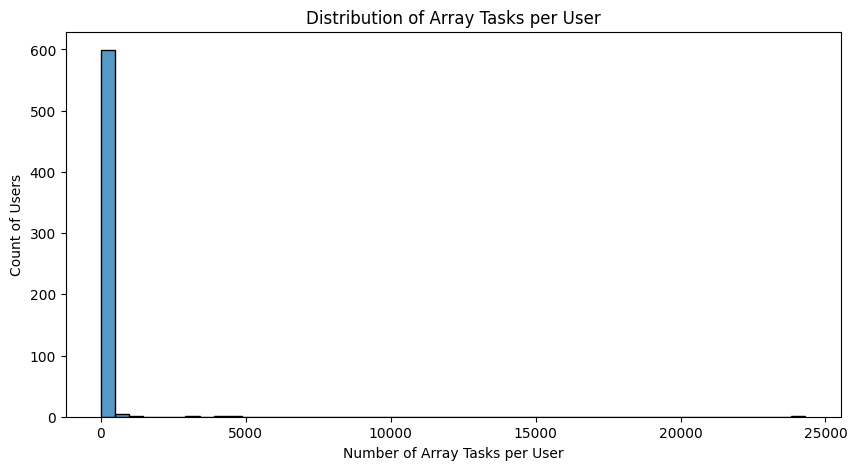

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
tasks_per_user = df.groupby('id_user')['id_array_task'].nunique().reset_index()
tasks_per_user.columns = ['id_user', 'num_array_tasks']

plt.figure(figsize=(10,5))
sns.histplot(tasks_per_user['num_array_tasks'], bins=50)
plt.title("Distribution of Array Tasks per User")
plt.xlabel("Number of Array Tasks per User")
plt.ylabel("Count of Users")
plt.show()


In [46]:
# Count the number of times each user killed jobs
kill_counts = df['kill_requid'].value_counts().reset_index()
kill_counts.columns = ['kill_user_id', 'jobs_killed']

# Display the top 10 users who killed the most jobs
top_killers = kill_counts.head(10)
print(top_killers)


     kill_user_id  jobs_killed
0  61026541062099       341934
1  30273376745109         5816
2  23247324987446         4370
3  36880203429568         3913
4  30756960474747         3229
5   1792907464779         3038
6  16618712154521         3011
7  28791209246369         2873
8  89050107702520         1264
9  87110995014675         1239


In [52]:
# # Number of array tasks per user
# tasks_per_user = df.groupby('id_user')['id_array_task'].nunique().reset_index()
# tasks_per_user.columns = ['id_user', 'num_array_tasks']

# # Merge back into main dataframe
# df_merged = df.merge(tasks_per_user, on='id_user', how='left')

# # Define user type categories (quartiles or thresholds)
# # compute bins with duplicates dropped
# _, bins = pd.qcut(df_merged['num_array_tasks'], q=4, retbins=True, duplicates='drop')
# labels = ['Light', 'Medium', 'Heavy', 'Super Heavy'][:len(bins)-1]

# df_merged['user_type'] = pd.cut(
#     df_merged['num_array_tasks'], bins=bins, labels=labels, include_lowest=True
# )


# df_merged['time_start'] = pd.to_datetime(df_merged['time_start'], unit='s')
# df_merged['time_end'] = pd.to_datetime(df_merged['time_end'], unit='s')
# df_merged['runtime'] = (df_merged['time_end'] - df_merged['time_start']).dt.total_seconds() / 60  # minutes

# # Binary failure indicator
# df_merged['failed'] = (df_merged['exit_code'] != 0).astype(int)

# import seaborn as sns
# import matplotlib.pyplot as plt

# failure_by_type = df_merged.groupby('user_type')['failed'].mean().reset_index()

# plt.figure(figsize=(7,5))
# sns.barplot(data=failure_by_type, x='user_type', y='failed')
# plt.title("Average Job Failure Rate by User Type")
# plt.xlabel("User Type (based on # of Array Tasks)")
# plt.ylabel("Failure Rate")
# plt.show()

# runtime_by_type = df_merged.groupby('user_type')['runtime'].mean().reset_index()

# plt.figure(figsize=(7,5))
# sns.barplot(data=runtime_by_type, x='user_type', y='runtime')
# plt.title("Average Job Runtime by User Type")
# plt.xlabel("User Type (based on # of Array Tasks)")
# plt.ylabel("Average Runtime (minutes)")
# plt.show()




/var/folders/2x/3v_8f01d6mz274j6__882xy80000gn/T/ipykernel_1109/3260122069.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  failure_by_type = df_merged.groupby('user_type', dropna=True)['failed'].mean().reset_index()
/var/folders/2x/3v_8f01d6mz274j6__882xy80000gn/T/ipykernel_1109/3260122069.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_by_type = df_merged.groupby('user_type', dropna=True)['runtime'].mean().reset_index()


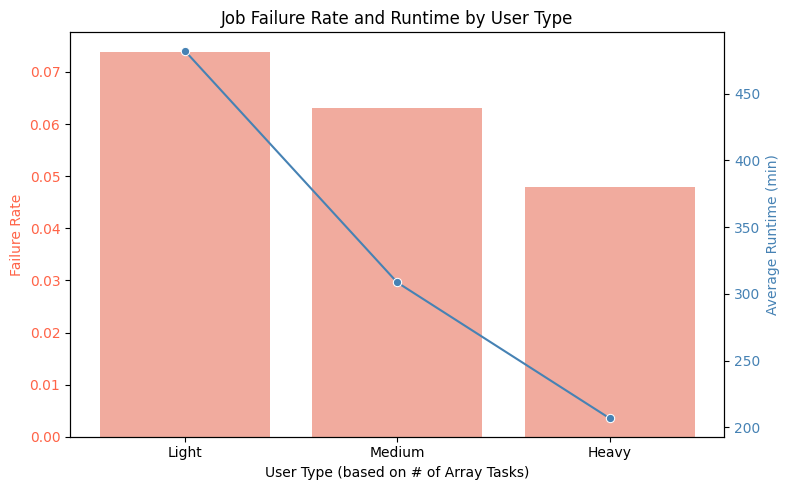

In [51]:
# Build summaries
failure_by_type = df_merged.groupby('user_type', dropna=True)['failed'].mean().reset_index()
runtime_by_type = df_merged.groupby('user_type', dropna=True)['runtime'].mean().reset_index()

# Merge so both metrics share the same x ordering
combo = failure_by_type.merge(runtime_by_type, on='user_type', how='inner')

# Ensure categorical order is preserved
order = combo['user_type'].astype(str).tolist()
combo['user_type'] = pd.Categorical(combo['user_type'], categories=order, ordered=True)

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,5))
sns.barplot(data=combo, x='user_type', y='failed', color='tomato', alpha=0.6, ax=ax1, order=order)
ax1.set_ylabel('Failure Rate', color='tomato')
ax1.set_xlabel('User Type (based on # of Array Tasks)')
ax1.tick_params(axis='y', labelcolor='tomato')

ax2 = ax1.twinx()
sns.lineplot(data=combo, x='user_type', y='runtime', marker='o', color='steelblue', ax=ax2, sort=False)
ax2.set_ylabel('Average Runtime (min)', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')

plt.title("Job Failure Rate and Runtime by User Type")
plt.tight_layout()
plt.show()


Failure Rate Decreases with Heavier Users
    Light users have the highest failure rate (~7%).
    Heavy users have the lowest (~2%).
    This means users who submit more jobs are less likely to have failed jobs.
    Likely explanation: experienced or automated users understand the cluster better, tune their resource requests correctly, and submit stable workloads.
Runtime Also Decreases with Heavier Users
    Light users’ jobs run the longest (≈470 min) on average.
    Heavy users’ jobs run the shortest (≈200 min).
    This indicates that heavy users may run many smaller, optimized, or batch-style tasks — while light users might run few, long-running, less-optimized jobs.
Overall Pattern
    As users become more active → fewer failures and shorter runtimes.
Suggests a causal relationship:
    “User experience (measured by submission activity) reduces job failures and runtime.”

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert timestamps
time_cols = ['time_submit','time_eligible','time_start','time_end']
df[time_cols] = df[time_cols].apply(pd.to_datetime, unit='s')

# Derived features
df['wait_time'] = (df['time_start'] - df['time_submit']).dt.total_seconds() / 60  # in minutes
df['runtime'] = (df['time_end'] - df['time_start']).dt.total_seconds() / 60       # in minutes
df['failed'] = (df['exit_code'] != 0).astype(int)                                 # binary target

# Drop obviously useless column
df = df.drop(columns=['gres_used'])


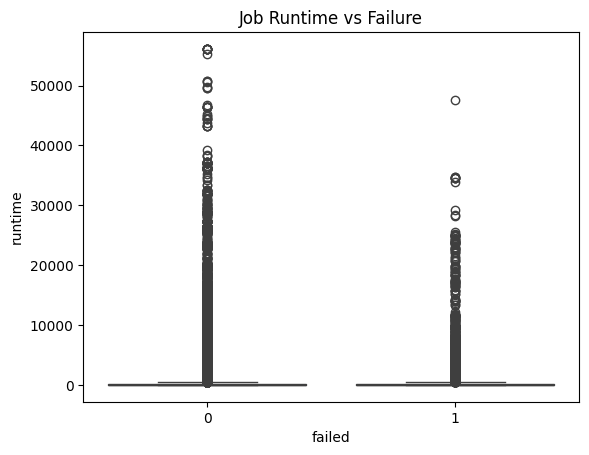

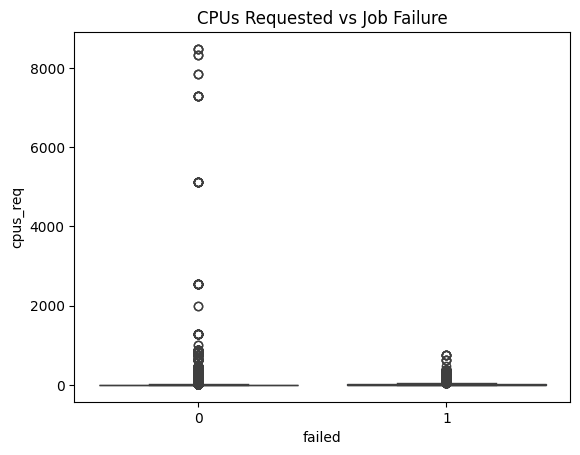

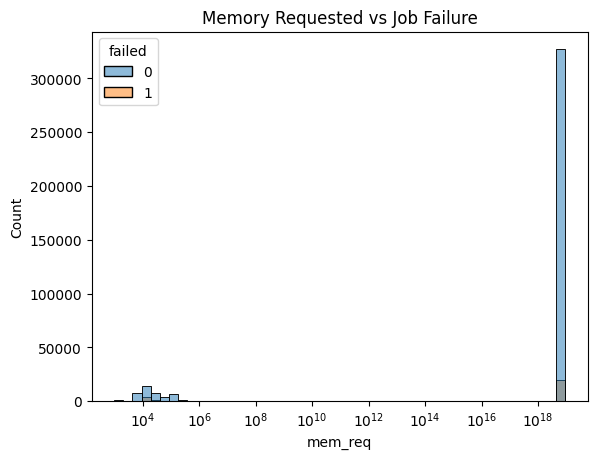

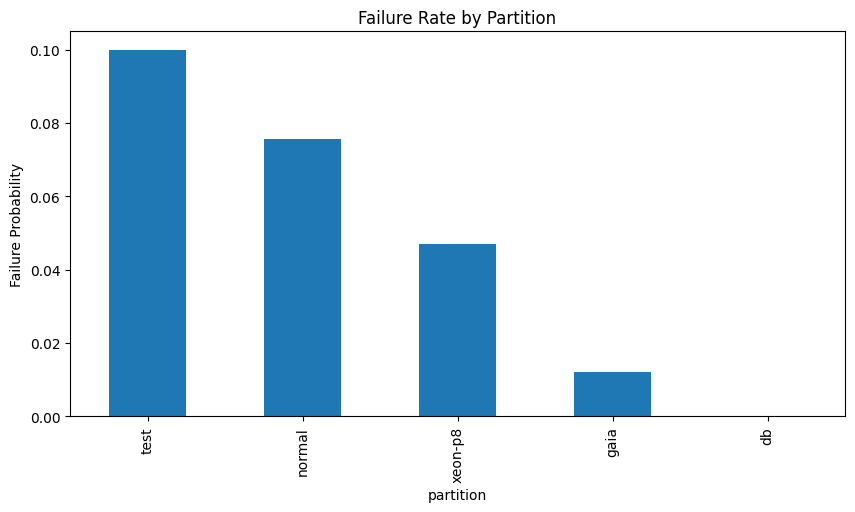

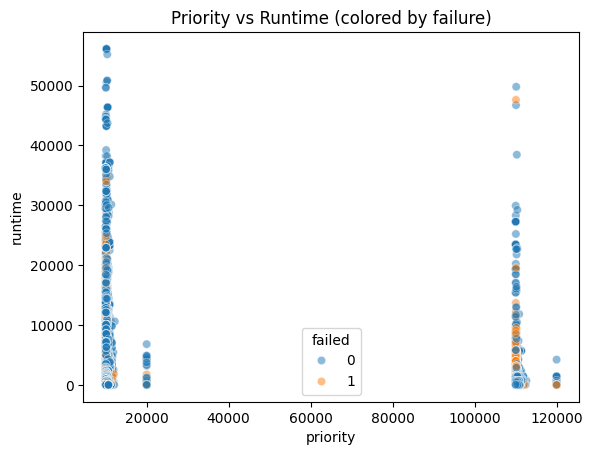

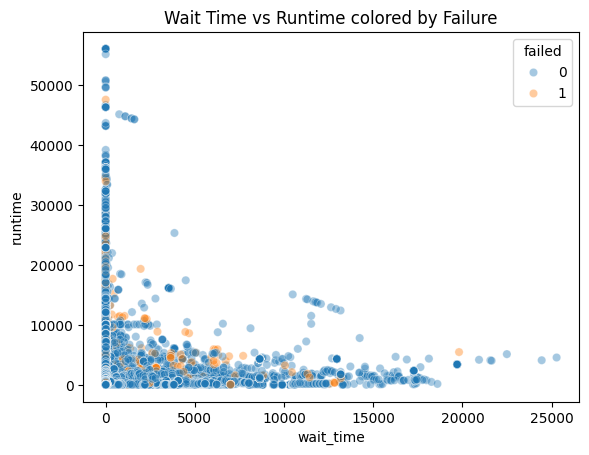

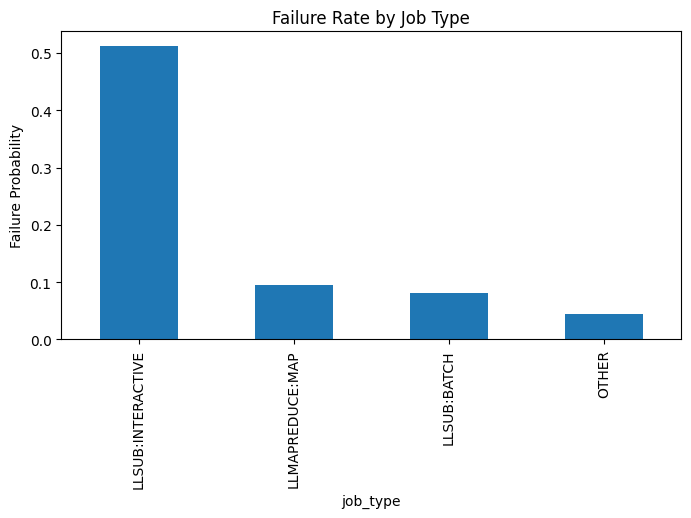

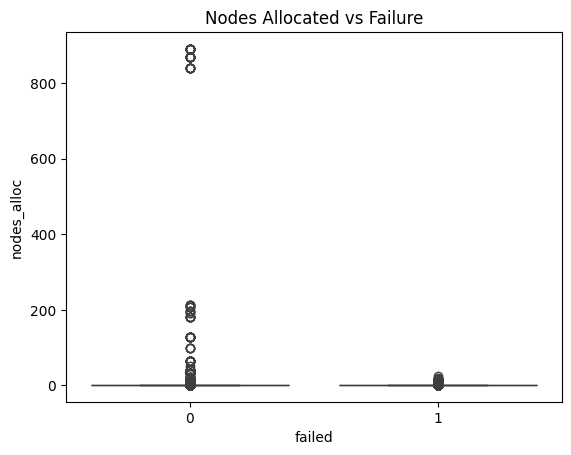

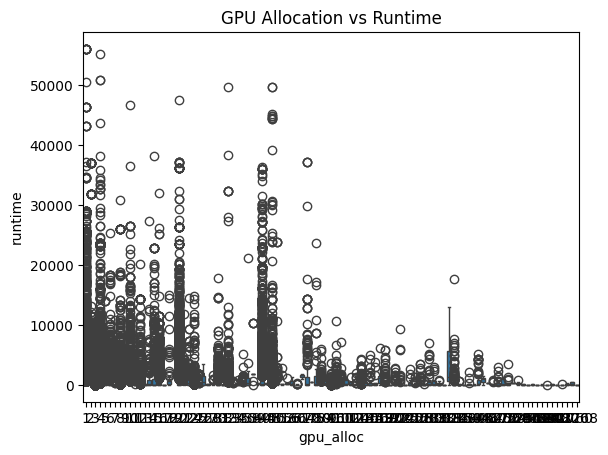

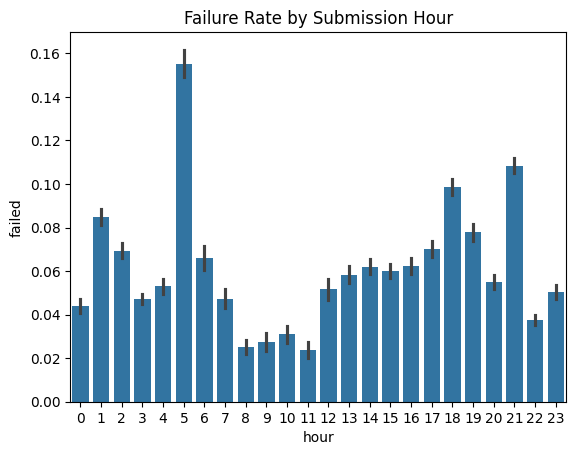

In [28]:
sns.boxplot(x='failed', y='runtime', data=df)
plt.title("Job Runtime vs Failure")
plt.show()

df.groupby('failed')['runtime'].describe()

sns.boxplot(x='failed', y='cpus_req', data=df)
plt.title("CPUs Requested vs Job Failure")
plt.show()

sns.histplot(data=df, x='mem_req', hue='failed', bins=50, log_scale=True)
plt.title("Memory Requested vs Job Failure")
plt.show()

failure_by_partition = df.groupby('partition')['failed'].mean().sort_values(ascending=False)
failure_by_partition.plot(kind='bar', figsize=(10,5), title="Failure Rate by Partition")
plt.ylabel("Failure Probability")
plt.show()

sns.scatterplot(data=df, x='priority', y='runtime', hue='failed', alpha=0.5)
plt.title("Priority vs Runtime (colored by failure)")
plt.show()

sns.scatterplot(data=df, x='wait_time', y='runtime', hue='failed', alpha=0.4)
plt.title("Wait Time vs Runtime colored by Failure")
plt.show()

failure_by_jobtype = df.groupby('job_type')['failed'].mean().sort_values(ascending=False)
failure_by_jobtype.plot(kind='bar', figsize=(8,4), title="Failure Rate by Job Type")
plt.ylabel("Failure Probability")
plt.show()

sns.boxplot(data=df, x='failed', y='nodes_alloc')
plt.title("Nodes Allocated vs Failure")
plt.show()

import re
df['gpu_alloc'] = df['tres_alloc'].apply(lambda x: int(re.search(r'5=(\d+)', x).group(1)) if '5=' in x else 0)
sns.boxplot(x='gpu_alloc', y='runtime', data=df)
plt.title("GPU Allocation vs Runtime")
plt.show()

df['hour'] = df['time_submit'].dt.hour
sns.barplot(x='hour', y='failed', data=df)
plt.title("Failure Rate by Submission Hour")
plt.show()



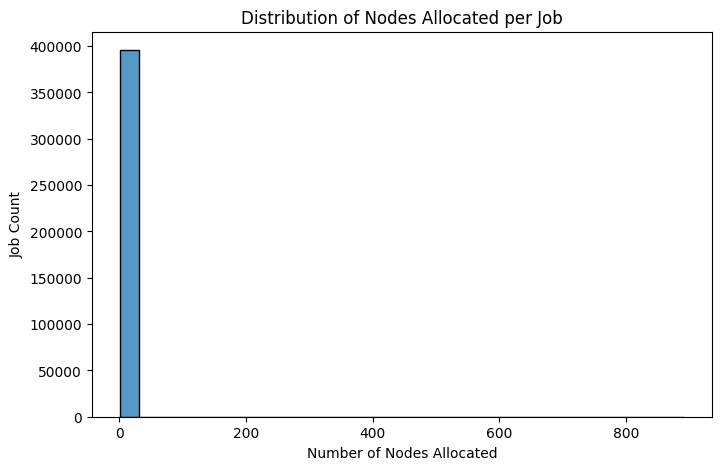

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['nodes_alloc'], bins=30)
plt.title("Distribution of Nodes Allocated per Job")
plt.xlabel("Number of Nodes Allocated")
plt.ylabel("Job Count")
plt.show()


In [18]:
num_unique_jobs = df['id_array_job'].nunique()
print(f"Number of unique jobs (based on id_array_job): {num_unique_jobs}")


Number of unique jobs (based on id_array_job): 9879


In [41]:
# nodes_per_array_job = (
#     df.groupby('id_array_job')['nodes_alloc']
#     .mean()  # or .sum() if you want total nodes used
#     .reset_index()
#     .sort_values('nodes_alloc', ascending=False)
# )
# plt.figure(figsize=(8,5))
# sns.histplot(nodes_per_array_job['nodes_alloc'], bins=30)
# plt.title("Distribution of Nodes Allocated per Array Job")
# plt.xlabel("Average Nodes Allocated")
# plt.ylabel("Number of Jobs")
# plt.show()





In [15]:
max_nodes = df['nodes_alloc'].max()
min_nodes = df['nodes_alloc'].min()

print(f"Maximum number of nodes allocated: {max_nodes}")
print(f"Minimum number of nodes allocated: {min_nodes}")


Maximum number of nodes allocated: 891
Minimum number of nodes allocated: 1


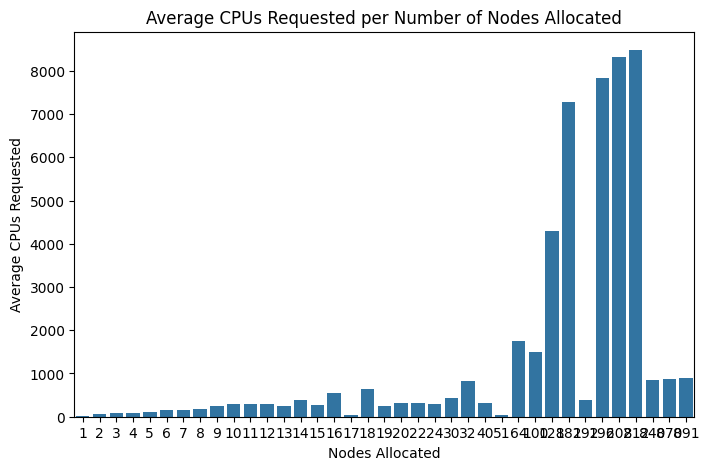

In [ ]:
avg_cpu_per_node = df.groupby('nodes_alloc')['cpus_req'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=avg_cpu_per_node, x='nodes_alloc', y='cpus_req')
plt.title("Average CPUs Requested per Number of Nodes Allocated")
plt.xlabel("Nodes Allocated")
plt.ylabel("Average CPUs Requested")
plt.show()

#more nodes take more cpu obviously


           id_job              nodelist  num_nodes_from_list
0  82691694838059  ['r9189566-n911952']                    1
1   3434806870797  ['r9189566-n911952']                    1
2   8370846758272  ['r9189566-n911952']                    1
3  50552783599355  ['r2100214-n851693']                    1
4  16051179268048  ['r9189566-n911952']                    1
Number of jobs where parsed nodelist != nodes_alloc: 0


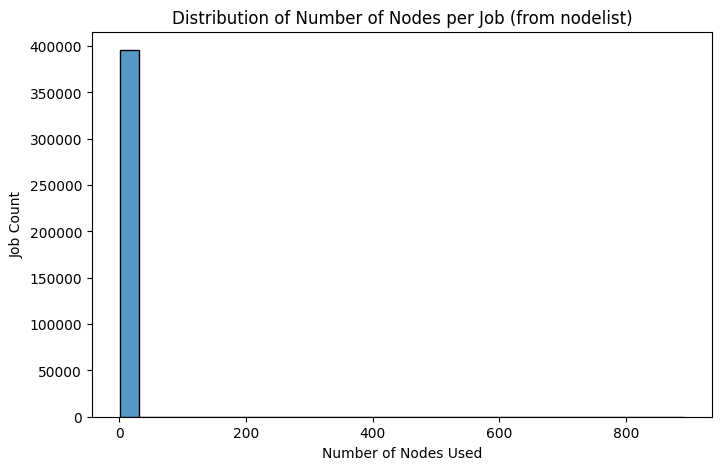

In [29]:
import ast

# Function to count nodes safely from the stringified list
def count_nodes(nodelist_str):
    try:
        # Convert string like "['node1','node2']" to Python list
        nodes = ast.literal_eval(nodelist_str)
        if isinstance(nodes, list):
            return len(nodes)
        else:
            # handle single string or weird formatting
            return 1
    except:
        return 0  # in case of malformed data

# Apply the function to nodelist column
df['num_nodes_from_list'] = df['nodelist'].apply(count_nodes)

# Preview
print(df[['id_job', 'nodelist', 'num_nodes_from_list']].head())

inconsistency = (df['num_nodes_from_list'] != df['nodes_alloc']).sum()
print(f"Number of jobs where parsed nodelist != nodes_alloc: {inconsistency}")


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['num_nodes_from_list'], bins=30)
plt.title("Distribution of Number of Nodes per Job (from nodelist)")
plt.xlabel("Number of Nodes Used")
plt.ylabel("Job Count")
plt.show()


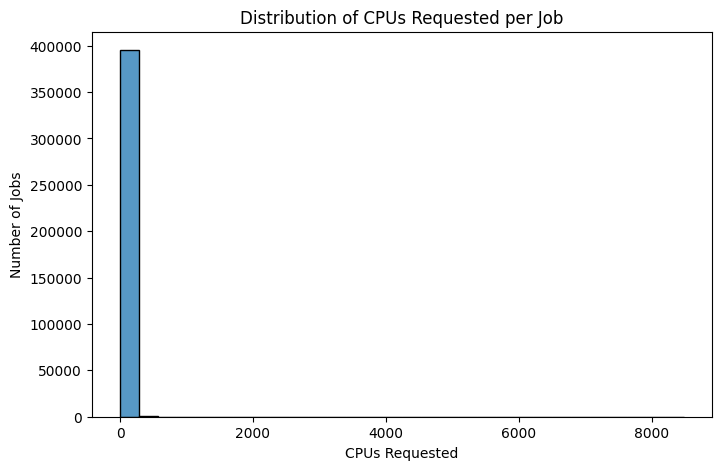

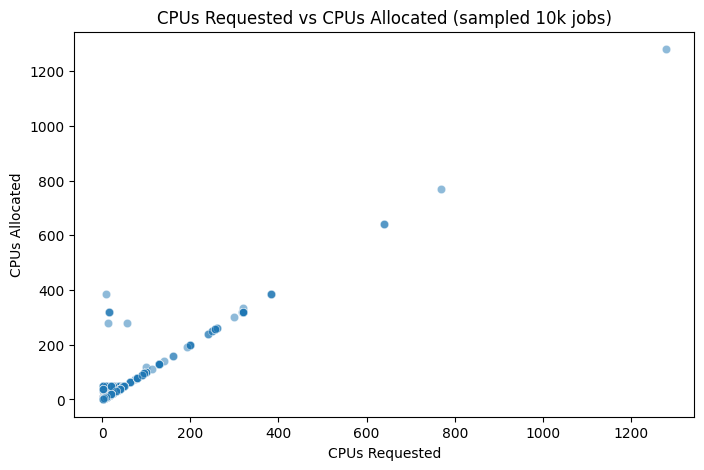

   cpus_req  cpus_alloc
0         1    4.711489
1         2    2.420215
2         3    3.533946
3         4    4.260234
4         5    5.003840
5         6    6.363902
6         7    7.417722
7         8    9.445253
8         9    9.000000
9        10   10.066022


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Each job’s CPU request
job_cpu = df[['id_job', 'cpus_req']]

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(job_cpu['cpus_req'], bins=30)
plt.title("Distribution of CPUs Requested per Job")
plt.xlabel("CPUs Requested")
plt.ylabel("Number of Jobs")
plt.show()

import re

def extract_cpus_alloc(tres_str):
    match = re.search(r'1=(\d+)', str(tres_str))
    return int(match.group(1)) if match else 0

df['cpus_alloc'] = df['tres_alloc'].apply(extract_cpus_alloc)

# Compare requested vs allocated
plt.figure(figsize=(8,5))
sns.scatterplot(data=df.sample(10000), x='cpus_req', y='cpus_alloc', alpha=0.5)
plt.title("CPUs Requested vs CPUs Allocated (sampled 10k jobs)")
plt.xlabel("CPUs Requested")
plt.ylabel("CPUs Allocated")
plt.show()

# Summary table
cpu_summary = df.groupby('cpus_req')['cpus_alloc'].mean().reset_index()
print(cpu_summary.head(10))




In [33]:
import re

def extract_resource(tres_str, key):
    """Extracts numeric value for resource type (e.g., key=1 for CPU, key=5 for GPU)."""
    match = re.search(fr'{key}=(\d+)', str(tres_str))
    return int(match.group(1)) if match else 0

# Extract CPU and GPU allocations
df['cpu_alloc'] = df['tres_alloc'].apply(lambda x: extract_resource(x, 1))
df['gpu_alloc'] = df['tres_alloc'].apply(lambda x: extract_resource(x, 5))


           count       mean         std  min  25%  50%   75%      max
failed                                                               
0       370150.0  15.415840  412.103198  1.0  1.0  4.0  10.0  42768.0
1        25764.0  12.947757   31.813447  1.0  1.0  4.0  20.0    768.0


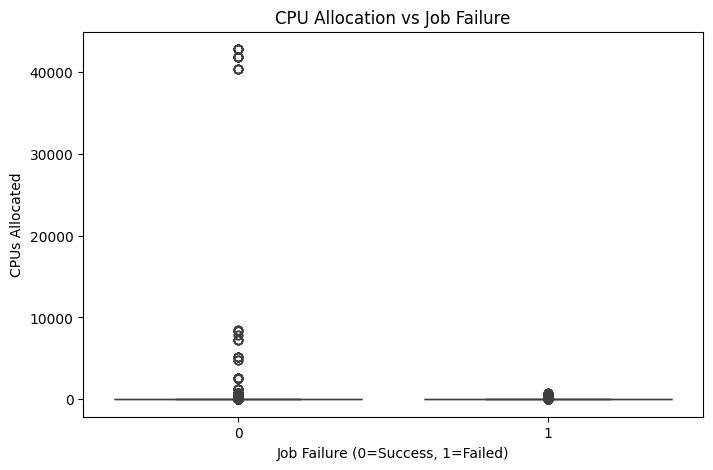

In [34]:
cpu_fail_summary = df.groupby('failed')['cpu_alloc'].describe()
print(cpu_fail_summary)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='failed', y='cpu_alloc')
plt.title("CPU Allocation vs Job Failure")
plt.xlabel("Job Failure (0=Success, 1=Failed)")
plt.ylabel("CPUs Allocated")
plt.show()


           count       mean         std  min  25%  50%   75%      max
failed                                                               
0       370150.0  15.415840  412.103198  1.0  1.0  4.0  10.0  42768.0
1        25764.0  12.947757   31.813447  1.0  1.0  4.0  20.0    768.0


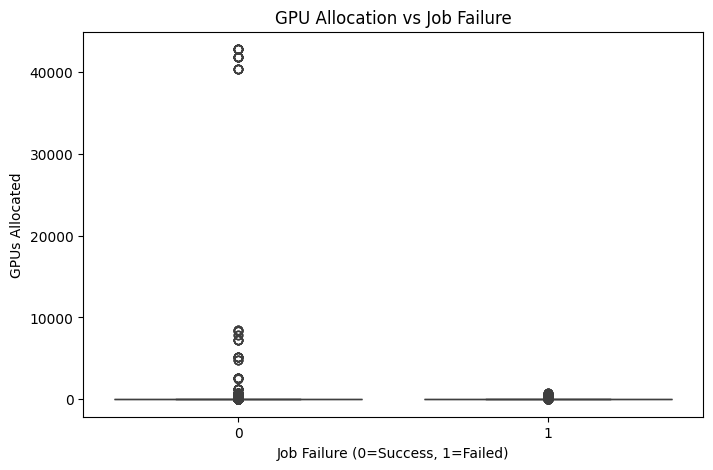

In [36]:
gpu_fail_summary = df.groupby('failed')['gpu_alloc'].describe()
print(gpu_fail_summary)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='failed', y='gpu_alloc')
plt.title("GPU Allocation vs Job Failure")
plt.xlabel("Job Failure (0=Success, 1=Failed)")
plt.ylabel("GPUs Allocated")
plt.show()


/var/folders/2x/3v_8f01d6mz274j6__882xy80000gn/T/ipykernel_1109/4147940476.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpu_fail_rate = df.groupby('cpu_bin')['failed'].mean().reset_index()


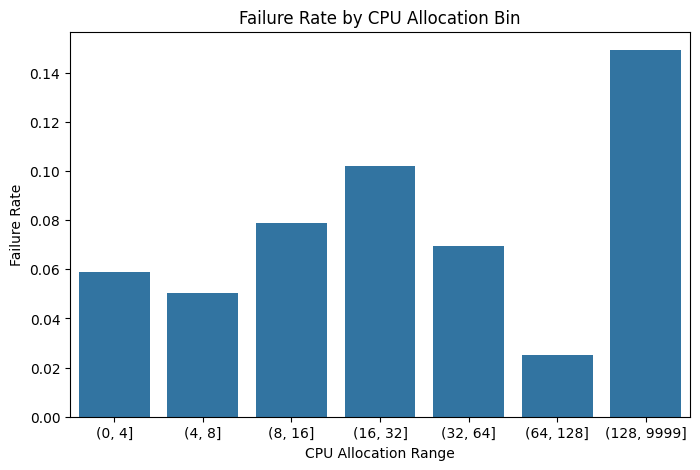

/var/folders/2x/3v_8f01d6mz274j6__882xy80000gn/T/ipykernel_1109/4147940476.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gpu_fail_rate = df.groupby('gpu_bin')['failed'].mean().reset_index()


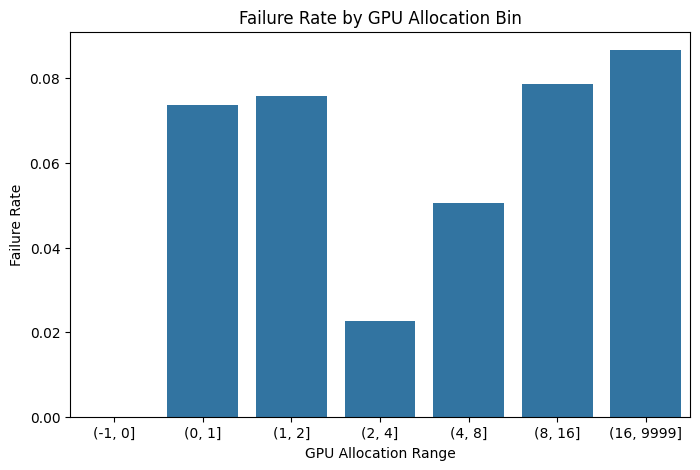

In [35]:
# CPU bins
df['cpu_bin'] = pd.cut(df['cpu_alloc'], bins=[0,4,8,16,32,64,128,9999])
cpu_fail_rate = df.groupby('cpu_bin')['failed'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=cpu_fail_rate, x='cpu_bin', y='failed')
plt.title("Failure Rate by CPU Allocation Bin")
plt.xlabel("CPU Allocation Range")
plt.ylabel("Failure Rate")
plt.show()

# GPU bins
df['gpu_bin'] = pd.cut(df['gpu_alloc'], bins=[-1,0,1,2,4,8,16,9999])
gpu_fail_rate = df.groupby('gpu_bin')['failed'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=gpu_fail_rate, x='gpu_bin', y='failed')
plt.title("Failure Rate by GPU Allocation Bin")
plt.xlabel("GPU Allocation Range")
plt.ylabel("Failure Rate")
plt.show()


/var/folders/2x/3v_8f01d6mz274j6__882xy80000gn/T/ipykernel_1109/1372278082.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gpu_summary = df.groupby('gpu_bin').agg(
/var/folders/2x/3v_8f01d6mz274j6__882xy80000gn/T/ipykernel_1109/1372278082.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)


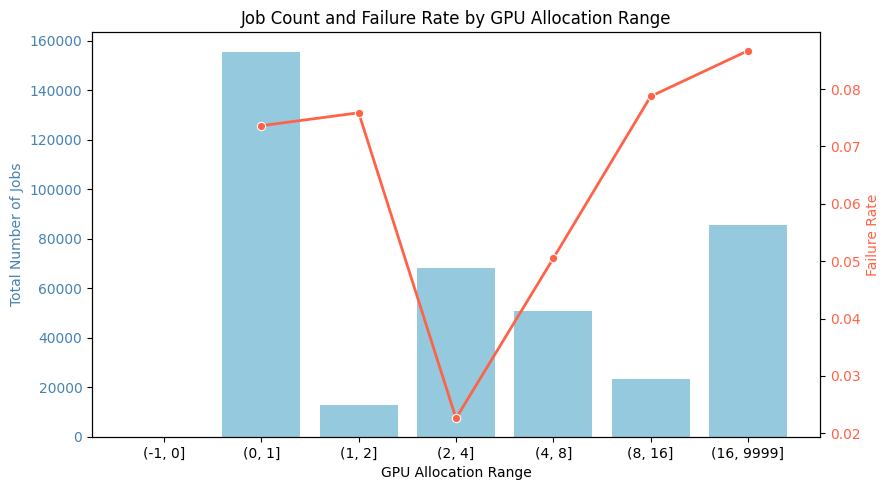

    bin_label  total_jobs  failed_jobs  failure_rate
0     (-1, 0]           0            0           NaN
1      (0, 1]      155531        11450      0.073619
2      (1, 2]       12718          965      0.075877
3      (2, 4]       68157         1541      0.022610
4      (4, 8]       50650         2558      0.050503
5     (8, 16]       23155         1823      0.078730
6  (16, 9999]       85668         7427      0.086695


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# If you haven't already created gpu_alloc and failed:
# df['gpu_alloc'] = df['tres_alloc'].str.extract(r'5=(\d+)').astype(float).fillna(0).astype(int)

# 1) Bin GPUs and summarize
df['gpu_bin'] = pd.cut(df['gpu_alloc'], bins=[-1,0,1,2,4,8,16,9999])
gpu_summary = df.groupby('gpu_bin').agg(
    total_jobs=('id_job', 'count'),
    failed_jobs=('failed', 'sum'),
    failure_rate=('failed', 'mean')
).reset_index()

# 2) Convert Interval to ordered strings for plotting
gpu_summary = gpu_summary.sort_values('gpu_bin')
gpu_summary['bin_label'] = gpu_summary['gpu_bin'].astype(str)

# 3) Combined chart
fig, ax1 = plt.subplots(figsize=(9,5))
sns.barplot(data=gpu_summary, x='bin_label', y='total_jobs', color='skyblue', ax=ax1)
ax1.set_ylabel('Total Number of Jobs', color='steelblue')
ax1.set_xlabel('GPU Allocation Range')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

ax2 = ax1.twinx()
sns.lineplot(data=gpu_summary, x='bin_label', y='failure_rate', marker='o', linewidth=2, ax=ax2, color='tomato')
ax2.set_ylabel('Failure Rate', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

plt.title('Job Count and Failure Rate by GPU Allocation Range')
plt.tight_layout()
plt.show()

# Also print the table for reference
print(gpu_summary[['bin_label', 'total_jobs', 'failed_jobs', 'failure_rate']])


Graph Summary — “Job Count and Failure Rate by GPU Allocation Range”
Blue Bars (Job Count):
    Most jobs use 0–1 GPU, followed by smaller peaks at 2–8 GPUs.
    Very few jobs run with many GPUs (>16).
Red Line (Failure Rate):
    Lowest failure rate (~2%) at 2–4 GPUs → these jobs are the most stable.
    Higher failure rates (~7–9%) for jobs with 0–1 GPU and >8 GPUs → both very small and very large GPU jobs tend to fail more.
Key Insight:
    The relationship is U-shaped:
        → Mid-size GPU jobs (2–4 GPUs) are the most reliable.
        → Very small and very large GPU jobs fail more often — likely due to misconfiguration (small jobs) or complexity (large distributed jobs).

/var/folders/2x/3v_8f01d6mz274j6__882xy80000gn/T/ipykernel_1109/3018509453.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpu_summary = df.groupby('cpu_bin').agg(
/var/folders/2x/3v_8f01d6mz274j6__882xy80000gn/T/ipykernel_1109/3018509453.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)


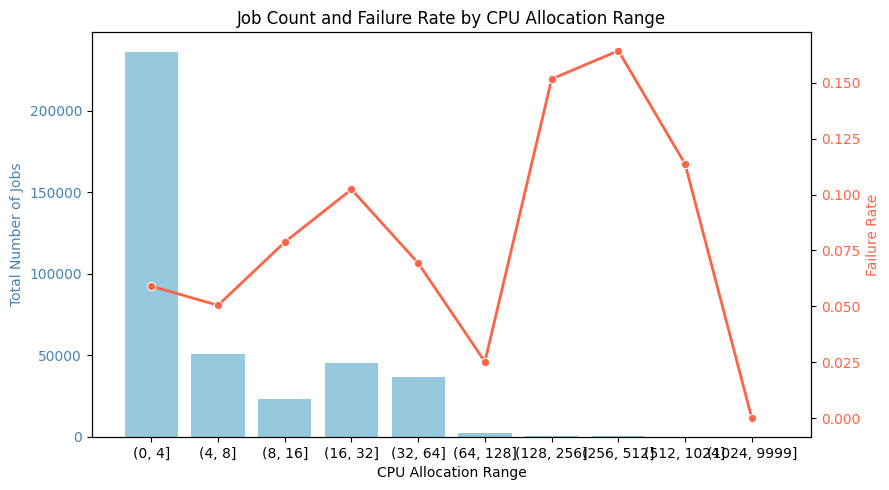

      bin_label  total_jobs  failed_jobs  failure_rate
0        (0, 4]      236406        13956      0.059034
1        (4, 8]       50650         2558      0.050503
2       (8, 16]       23155         1823      0.078730
3      (16, 32]       44992         4602      0.102285
4      (32, 64]       36645         2542      0.069368
5     (64, 128]        2571           65      0.025282
6    (128, 256]         620           94      0.151613
7    (256, 512]         694          114      0.164265
8   (512, 1024]          88           10      0.113636
9  (1024, 9999]          58            0      0.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# If you haven't already extracted CPU allocation:
# df['cpu_alloc'] = df['tres_alloc'].str.extract(r'1=(\d+)').astype(float).fillna(0).astype(int)

#Bin CPU allocations and compute summary stats
df['cpu_bin'] = pd.cut(df['cpu_alloc'], bins=[0,4,8,16,32,64,128,256,512,1024,9999])

cpu_summary = df.groupby('cpu_bin').agg(
    total_jobs=('id_job', 'count'),
    failed_jobs=('failed', 'sum'),
    failure_rate=('failed', 'mean')
).reset_index()

#  Convert interval bins to string labels for plotting
cpu_summary = cpu_summary.sort_values('cpu_bin')
cpu_summary['bin_label'] = cpu_summary['cpu_bin'].astype(str)

# Combined visualization: job count + failure rate
fig, ax1 = plt.subplots(figsize=(9,5))

# Barplot: total jobs
sns.barplot(data=cpu_summary, x='bin_label', y='total_jobs', color='skyblue', ax=ax1)
ax1.set_ylabel('Total Number of Jobs', color='steelblue')
ax1.set_xlabel('CPU Allocation Range')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Lineplot: failure rate
ax2 = ax1.twinx()
sns.lineplot(data=cpu_summary, x='bin_label', y='failure_rate', marker='o', linewidth=2, ax=ax2, color='tomato')
ax2.set_ylabel('Failure Rate', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

# Title and layout
plt.title('Job Count and Failure Rate by CPU Allocation Range')
plt.tight_layout()
plt.show()

# Print summary table
print(cpu_summary[['bin_label', 'total_jobs', 'failed_jobs', 'failure_rate']])


Detailed Interpretation — Job Count and Failure Rate by CPU Allocation
1. (0–4 CPUs): High usage, moderate failure rate
Observation: Most jobs fall here — short, lightweight, single-node tasks.
Why failures happen:
Users often submit quick test or debugging jobs that fail intentionally or due to incorrect configs.
These jobs are less monitored and might exceed memory or I/O limits despite low CPU needs.
Some failures could be from preemptions or timeouts (e.g., short walltime).

2. (8–64 CPUs): Moderate usage, relatively stable
Observation: These are production or medium-scale jobs — well-configured and efficiently distributed.
Why fewer failures:
These jobs are often well-tested and run under stable conditions.
Typically use single nodes or small node groups, so less inter-node communication → fewer sync issues.
Resource requests (CPU, memory) are usually balanced and predictable.

3. (128–512 CPUs): Very few jobs, but high failure rate (~15%)
Observation: This range shows a sharp rise in failures despite low job count.
Probable causes:
Network bottlenecks / communication errors — distributed MPI or parallel frameworks (e.g., TensorFlow, OpenMP) may fail due to node miscommunication or latency.
Job scheduling contention: large jobs wait longer, increasing queue and preemption risks.
Resource exhaustion: system may struggle to allocate all CPUs or memory, causing job startup failures.
Checkpointing or I/O overload: parallel file systems (like Lustre/GPFS) may be overwhelmed.

4. (>1024 CPUs): Fewest jobs, low apparent failure rate
Observation: These are massive, likely “hero” jobs.
Why low failure rate:
Run by expert users or automated workflows with robust configurations.
Dedicated node reservations or special queues may provide stable environments.
Often benefit from administrator oversight or longer walltimes, reducing premature termination.

⚙️ Overall System Insight
Failure drivers are not linear — they depend on how distributed the job is.
Small jobs fail due to user error or under-allocation,
while large jobs fail due to systemic or communication complexity.
Mid-sized jobs hit the “sweet spot” — efficient, manageable, and stable.


/var/folders/2x/3v_8f01d6mz274j6__882xy80000gn/T/ipykernel_1109/940305947.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mem_summary = df.groupby('mem_bin').agg(
/var/folders/2x/3v_8f01d6mz274j6__882xy80000gn/T/ipykernel_1109/940305947.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)


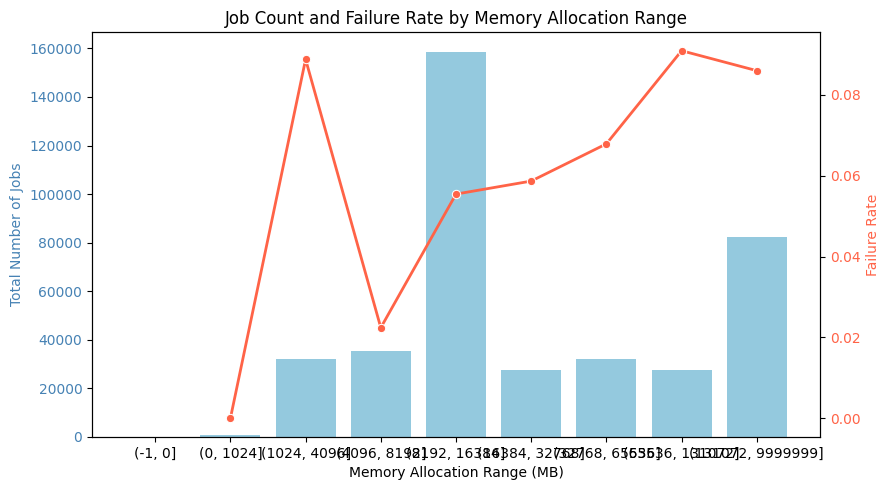

           bin_label  total_jobs  failed_jobs  failure_rate
0            (-1, 0]           0            0           NaN
1          (0, 1024]         600            0      0.000000
2       (1024, 4096]       31984         2838      0.088732
3       (4096, 8192]       35526          796      0.022406
4      (8192, 16384]      158697         8796      0.055426
5     (16384, 32768]       27318         1602      0.058643
6     (32768, 65536]       32043         2174      0.067846
7    (65536, 131072]       27359         2486      0.090866
8  (131072, 9999999]       82295         7072      0.085935


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['mem_alloc'] = df['tres_alloc'].str.extract(r'2=(\d+)').astype(float).fillna(0).astype(int)


df['mem_bin'] = pd.cut(df['mem_alloc'], bins=[-1, 0, 1024, 4096, 8192, 16384, 32768, 65536, 131072, 9999999])

# Summarize job count and failure rate per bin
mem_summary = df.groupby('mem_bin').agg(
    total_jobs=('id_job', 'count'),
    failed_jobs=('failed', 'sum'),
    failure_rate=('failed', 'mean')
).reset_index()

# Convert intervals to labels for clean plotting
mem_summary = mem_summary.sort_values('mem_bin')
mem_summary['bin_label'] = mem_summary['mem_bin'].astype(str)

# Combined plot (like GPU & CPU charts)
fig, ax1 = plt.subplots(figsize=(9,5))

# Bar chart: total job count per memory bin
sns.barplot(data=mem_summary, x='bin_label', y='total_jobs', color='skyblue', ax=ax1)
ax1.set_ylabel('Total Number of Jobs', color='steelblue')
ax1.set_xlabel('Memory Allocation Range (MB)')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Line chart: failure rate
ax2 = ax1.twinx()
sns.lineplot(data=mem_summary, x='bin_label', y='failure_rate', marker='o', color='tomato', linewidth=2, ax=ax2)
ax2.set_ylabel('Failure Rate', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

plt.title('Job Count and Failure Rate by Memory Allocation Range')
plt.tight_layout()
plt.show()

# 🧾 Print summary table
print(mem_summary[['bin_label', 'total_jobs', 'failed_jobs', 'failure_rate']])


Graph Summary — “Job Count and Failure Rate by Memory Allocation Range”
Blue Bars (Job Count):
    Most jobs use 8–16 GB of memory — the typical sweet spot for balanced workloads.
    Smaller jobs (1–4 GB) and very large-memory jobs (>64 GB) are less common.
    Extremely low-memory jobs (0–1 GB) are rare.
Red Line (Failure Rate):
    High failure rate (~9%) for 1–4 GB jobs — these likely fail due to insufficient memory requests or OOM (out-of-memory) errors.
    Lowest failure rates (~3–4%) around 8–16 GB — jobs are well-tuned and stable.
    Failure rate rises again beyond 32 GB, peaking at 64–128 GB+, suggesting:
    Scheduling or allocation failures (cluster can’t reserve enough memory).
    Long runtimes with memory leaks or swap issues.
    I/O bottlenecks in large memory-intensive tasks (like training large models or simulations).
Key Insight:
    Under-provisioning (too little memory) and over-demanding (too much memory) both lead to failures.
    Medium-memory jobs (8–16 GB) are most efficient and reliable — likely represent well-configured production workloads.

/var/folders/2x/3v_8f01d6mz274j6__882xy80000gn/T/ipykernel_1109/3949516066.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['req_bin', 'alloc_bin'])


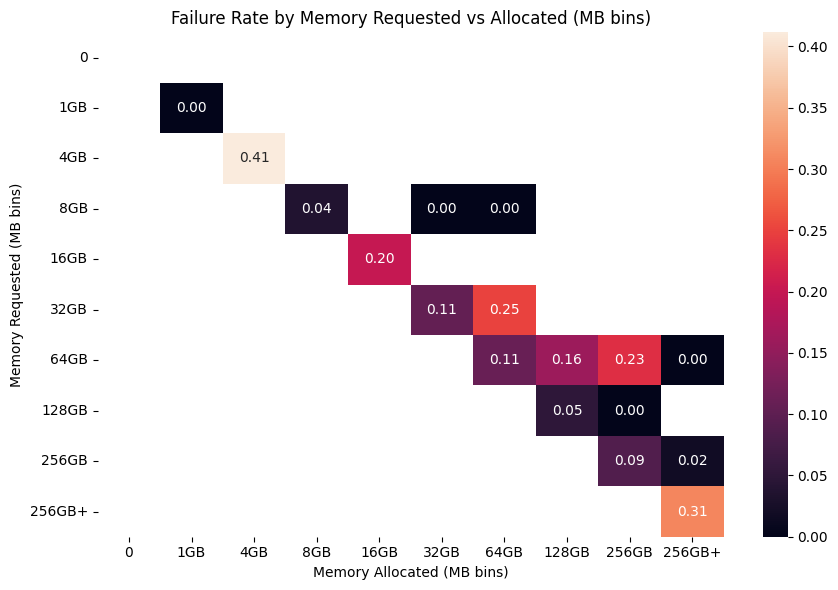

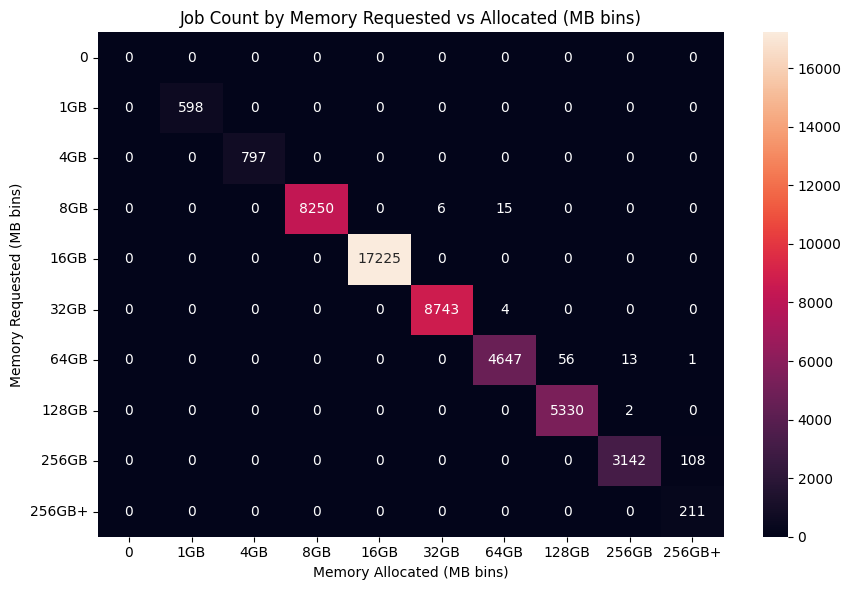

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 0) Ensure needed columns exist ---
# failed flag (0/1)
if 'failed' not in df.columns:
    df['failed'] = (df['exit_code'] != 0).astype(int)

# mem_req should already be present; coerce to numeric just in case
df['mem_req'] = pd.to_numeric(df['mem_req'], errors='coerce').fillna(0).astype(int)

# --- 1) Extract memory allocated (MB) from tres_alloc: "2=<MB>"
def extract_mem_mb(tres_str):
    m = re.search(r'2=(\d+)', str(tres_str))
    return int(m.group(1)) if m else 0

df['mem_alloc'] = df['tres_alloc'].apply(extract_mem_mb).astype(int)

# --- 2) Define memory bins (MB). 
mem_bins = [-1, 0, 1024, 4096, 8192, 16384, 32768, 65536, 131072, 262144, np.inf]
bin_labels = ["0", "1GB", "4GB", "8GB", "16GB", "32GB", "64GB", "128GB", "256GB", "256GB+"]

df['req_bin']   = pd.cut(df['mem_req'],   bins=mem_bins, labels=bin_labels)
df['alloc_bin'] = pd.cut(df['mem_alloc'], bins=mem_bins, labels=bin_labels)

# --- 3) Aggregate: counts and failure rate per (requested, allocated) bin ---
mem2d = (
    df.groupby(['req_bin', 'alloc_bin'])
      .agg(total_jobs=('id_job','count'),
           failed_jobs=('failed','sum'),
           failure_rate=('failed','mean'))
      .reset_index()
)

# --- 4) Pivot for heatmaps ---
fail_mat  = mem2d.pivot(index='req_bin', columns='alloc_bin', values='failure_rate')
count_mat = mem2d.pivot(index='req_bin', columns='alloc_bin', values='total_jobs')

# --- 5) Plot failure-rate heatmap ---
plt.figure(figsize=(9,6))
sns.heatmap(fail_mat, annot=True, fmt=".2f")
plt.title("Failure Rate by Memory Requested vs Allocated (MB bins)")
plt.xlabel("Memory Allocated (MB bins)")
plt.ylabel("Memory Requested (MB bins)")
plt.tight_layout()
plt.show()

# --- 6) Plot job-count heatmap (to see where the data mass is) ---
plt.figure(figsize=(9,6))
sns.heatmap(count_mat, annot=True, fmt=".0f")
plt.title("Job Count by Memory Requested vs Allocated (MB bins)")
plt.xlabel("Memory Allocated (MB bins)")
plt.ylabel("Memory Requested (MB bins)")
plt.tight_layout()
plt.show()





In [56]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 44.2 MB/s  0:00:00 eta 0:00:01

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


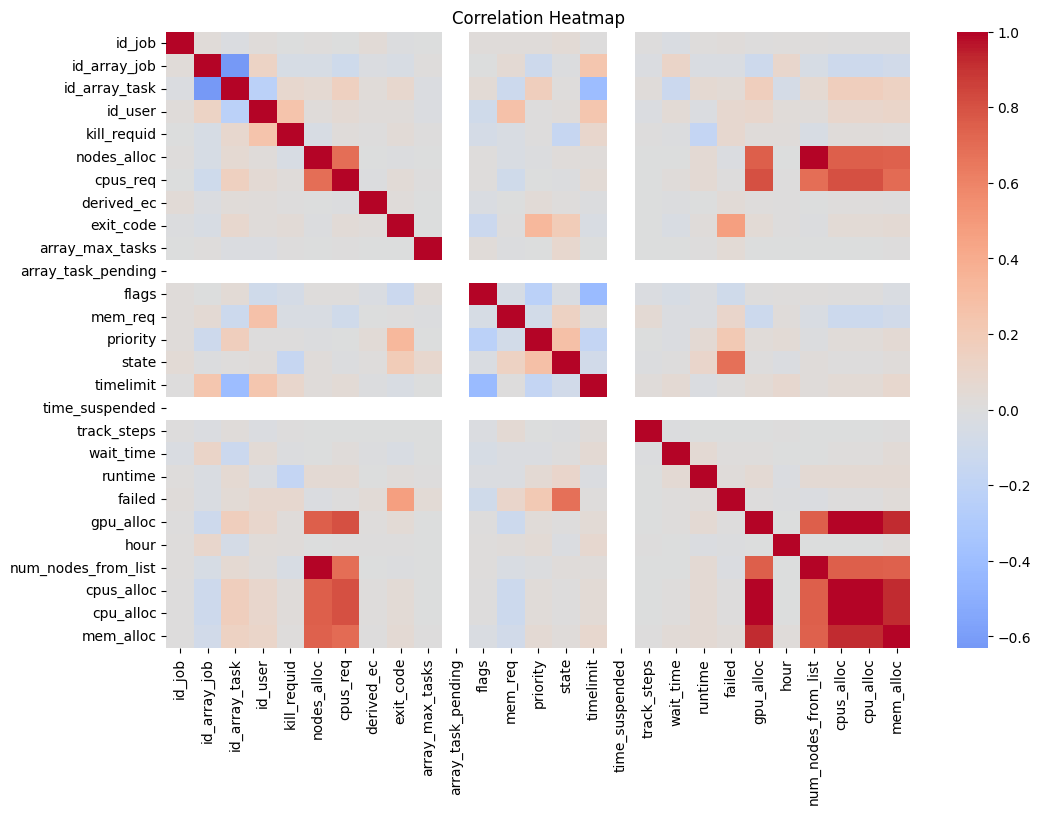

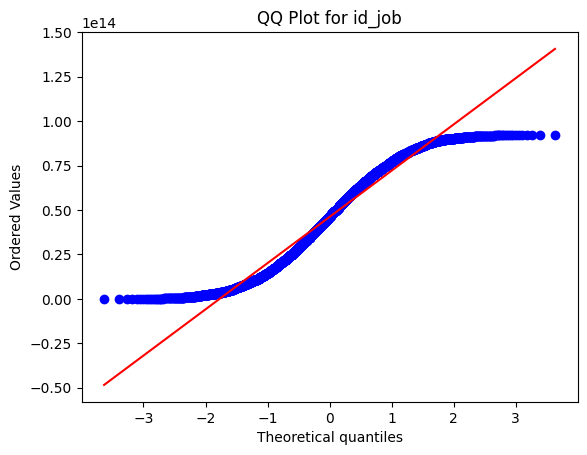

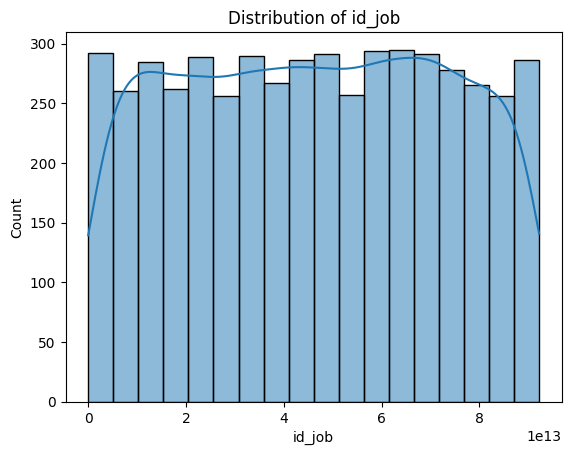

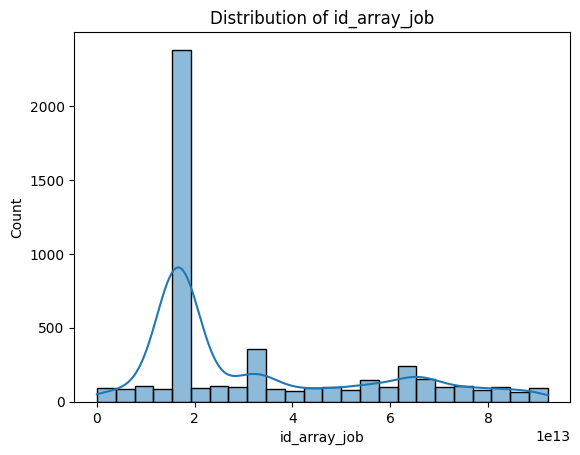

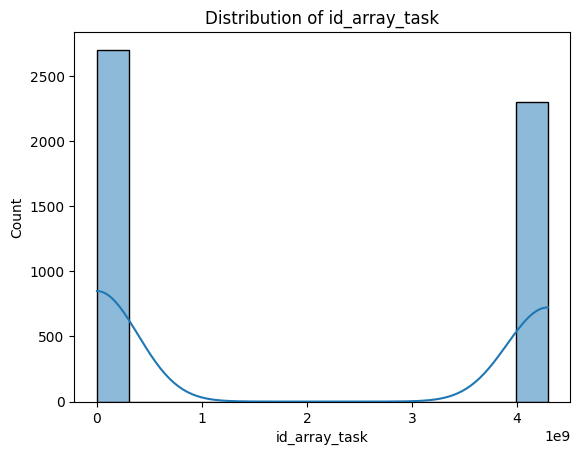

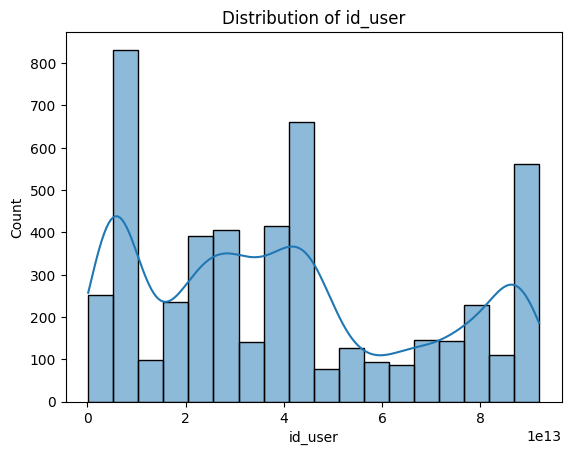

,id_job,id_array_job,id_array_task,id_user,kill_requid,nodes_alloc,cpus_req,derived_ec,exit_code,array_max_tasks,...,track_steps,wait_time,runtime,failed,gpu_alloc,hour,num_nodes_from_list,cpus_alloc,cpu_alloc,mem_alloc
count,3.959140e+05,3.959140e+05,3.959140e+05,3.959140e+05,3.959140e+05,395914.000000,395914.000000,395914.000000,395914.000000,395914.000000,...,395914.000000,395914.000000,395914.000000,395914.000000,395914.000000,395914.000000,395914.000000,395914.000000,395914.000000,3.959140e+05
mean,4.610060e+13,3.236990e+13,2.012880e+09,4.031554e+13,5.756691e+13,1.146747,9.233937,9.856971,496.348278,0.002301,...,0.000215,283.796948,372.463605,0.065075,15.255230,12.411504,1.146747,15.255230,15.255230,8.923605e+04
std,2.659772e+13,2.335241e+13,2.143262e+09,2.823768e+13,1.242477e+13,8.362052,63.951753,679.462686,4129.743289,0.425734,...,0.014651,874.020158,1477.450731,0.246658,398.551963,7.676481,8.362052,398.551963,398.551963,1.659275e+06
min,4.094992e+08,1.380238e+09,0.000000e+00,1.670203e+11,1.670203e+11,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+03
25%,2.308147e+13,1.661871e+13,8.400000e+01,1.751613e+13,6.102654e+13,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.083333,12.466667,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000,8.500000e+03
50%,4.610411e+13,1.661871e+13,1.721250e+04,3.729960e+13,6.102654e+13,1.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,4.550000,44.000000,0.000000,4.000000,14.000000,1.000000,4.000000,4.000000,1.520000e+04
75%,6.912639e+13,4.977345e+13,4.294967e+09,6.639843e+13,6.102654e+13,1.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,138.983333,222.066667,0.000000,10.000000,19.000000,1.000000,10.000000,10.000000,8.500000e+04
max,9.223364e+13,9.222687e+13,4.294967e+09,9.200127e+13,9.200127e+13,891.000000,8480.000000,58880.000000,65280.000000,160.000000,...,1.000000,25279.000000,56118.900000,1.000000,42768.000000,23.000000,891.000000,42768.000000,42768.000000,1.710720e+08


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Drop irrelevant or non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Basic statistics
desc = numeric_df.describe()

# Pairplot for visual linearity / nonlinearity clues
sampled = numeric_df.sample(n=5000, random_state=42) if len(numeric_df) > 5000 else numeric_df

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(sampled.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

# QQ plot for normality (for one representative numeric variable)
col_to_test = sampled.columns[0]
stats.probplot(sampled[col_to_test], dist="norm", plot=plt)
plt.title(f"QQ Plot for {col_to_test}")
plt.show()

# Distribution plots
for col in sampled.columns[:4]:  # only first 4 for quick EDA
    sns.histplot(sampled[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

desc


In [59]:
!pip install caas_jupyter_tools

ERROR: Could not find a version that satisfies the requirement caas_jupyter_tools (from versions: none)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for caas_jupyter_tools



Top Pearson correlations:
          f1                    f2      corr
0  cpus_req         tres_alloc_fs       NaN
1  cpus_req       tres_alloc_vmem       NaN
2  cpus_req      tres_alloc_pages       NaN
3  cpus_req          tres_req_cpu  0.999998
4  cpus_req          tres_req_mem  0.985173
5  cpus_req  tres_alloc_gpu_volta  0.875335
6  cpus_req        tres_alloc_mem  0.430075
7  cpus_req            derived_ec  0.378321
8  cpus_req           nodes_alloc  0.309940
9  cpus_req       tres_alloc_node  0.309940

Top Spearman correlations:
             f1                  f2      corr
0     cpus_req      tres_alloc_cpu  0.860227
1     cpus_req  tres_alloc_billing  0.860227
2  time_submit  tres_alloc_billing  0.402384
3     cpus_req            priority -0.353466
4     cpus_req         time_submit  0.343471
5     cpus_req            time_end  0.343143
6     cpus_req          time_start  0.343020
7     cpus_req       tres_alloc_fs       NaN
8     cpus_req     tres_alloc_vmem       NaN
9     cpu

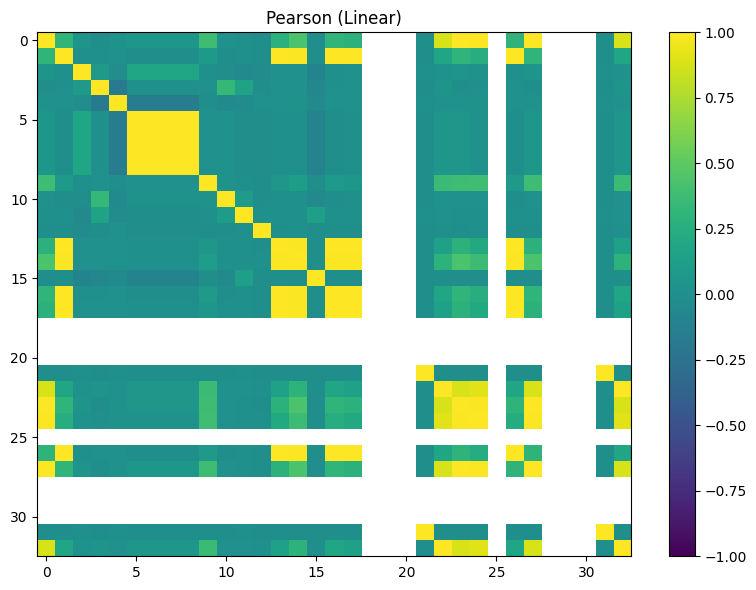

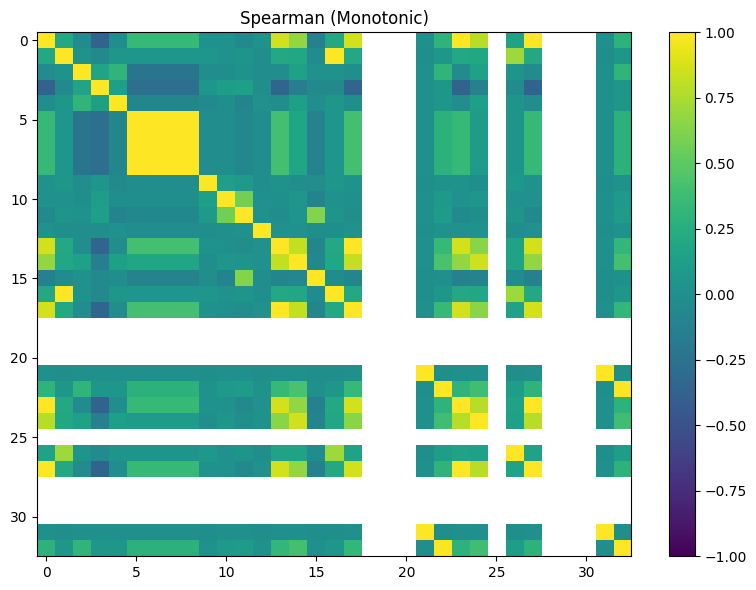

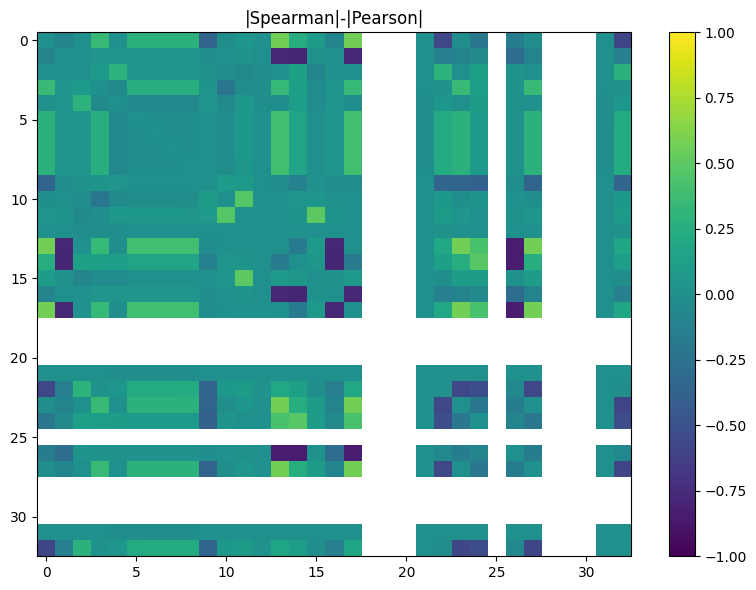

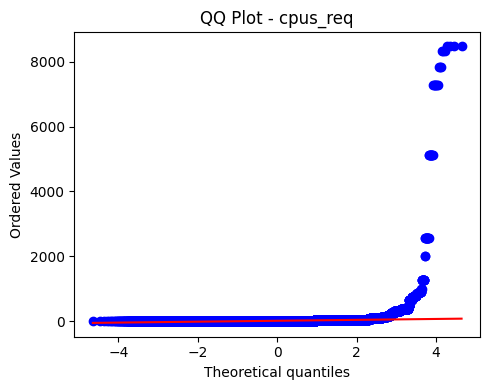

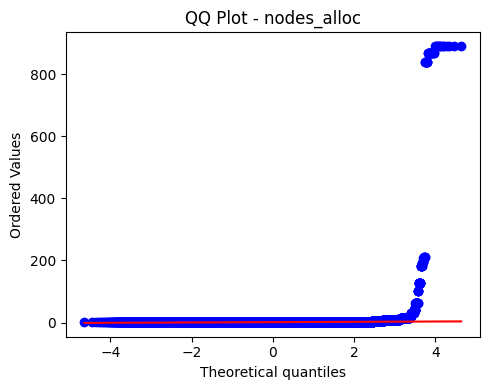

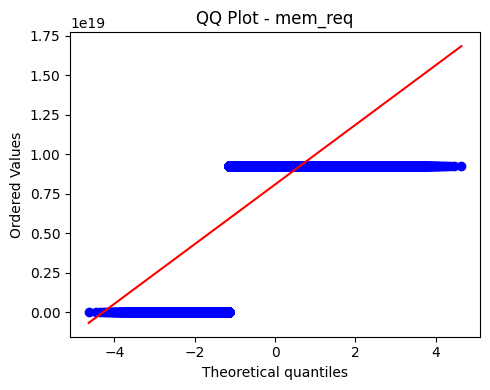

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations

# ---------- Load & drop 'array' columns ----------
df = pd.read_csv("mit_supercloud_dataset_s 2/slurm-log.csv")
cols_to_drop = [c for c in df.columns if 'array' in c.lower()]
df = df.drop(columns=cols_to_drop, errors='ignore')

# ---------- Vectorized TRES parsing ----------
tres_map = {
    1: "cpu", 2: "mem", 3: "energy", 4: "node", 5: "billing",
    6: "fs", 7: "vmem", 8: "pages", 1001: "gpu_tesla", 1002: "gpu_volta"
}

import re
def extract_tres_cols(series, prefix):
    out = {}
    s = series.fillna("")
    for k, name in tres_map.items():
        pat = rf'(?:^|,){k}=([0-9]*\.?[0-9]+)'
        out[f"{prefix}_{name}"] = pd.to_numeric(s.str.extract(pat, expand=False), errors='coerce').fillna(0.0)
    return pd.DataFrame(out)

if 'tres_alloc' in df.columns:
    df = pd.concat([df.drop(columns=['tres_alloc']), extract_tres_cols(df['tres_alloc'], 'tres_alloc')], axis=1)
if 'tres_req' in df.columns:
    df = pd.concat([df.drop(columns=['tres_req']), extract_tres_cols(df['tres_req'], 'tres_req')], axis=1)

# ---------- Numeric subset ----------
keep_like = ['cpus_req','nodes_alloc','mem_req','priority','timelimit',
             'time_submit','time_eligible','time_start','time_end',
             'derived_ec','exit_code','state','track_steps']
tres_cols = [c for c in df.columns if c.startswith('tres_alloc_') or c.startswith('tres_req_')]
candidate_cols = [c for c in keep_like if c in df.columns] + tres_cols

num_df = df[candidate_cols].select_dtypes(include=[np.number]).copy()
num_df = num_df.fillna(num_df.median(numeric_only=True))

# ---------- Correlations ----------
pearson_corr = num_df.corr(method='pearson')
spearman_corr = num_df.corr(method='spearman')
delta_corr = spearman_corr.abs() - pearson_corr.abs()

def top_pairs(mat, k=10):
    pairs = []
    cols = mat.columns
    for i, j in combinations(range(len(cols)), 2):
        pairs.append((cols[i], cols[j], mat.iloc[i,j]))
    return pd.DataFrame(sorted(pairs, key=lambda x: abs(x[2]), reverse=True)[:k],
                        columns=['f1','f2','corr'])

print("\nTop Pearson correlations:\n", top_pairs(pearson_corr))
print("\nTop Spearman correlations:\n", top_pairs(spearman_corr))
print("\nTop |Spearman|-|Pearson| (nonlinear monotonic):\n",
      top_pairs(delta_corr).sort_values('corr', ascending=False))

# ---------- Normality, skew, kurtosis ----------
np.random.seed(42)
stats_list = []
for col in num_df.columns:
    x = num_df[col].sample(min(10000, len(num_df)), random_state=42)
    k2, p = stats.normaltest(x)
    stats_list.append({
        'feature': col,
        'p_normaltest': p,
        'skew': stats.skew(x),
        'kurtosis_excess': stats.kurtosis(x, fisher=True)
    })
normality_df = pd.DataFrame(stats_list).sort_values('p_normaltest')
print("\nNormality test summary:\n", normality_df.head(10))

# ---------- Outlier fractions ----------
outlier_info = []
for col in num_df.columns:
    q1, q3 = np.percentile(num_df[col], [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outliers = ((num_df[col] < lower) | (num_df[col] > upper)).sum()
    outlier_info.append({'feature': col,
                         'outlier_frac': outliers / len(num_df)})
print("\nTop outlier features:\n",
      pd.DataFrame(outlier_info).sort_values('outlier_frac', ascending=False).head(10))

# ---------- Visuals ----------
def plot_heatmap(mat, title):
    plt.figure(figsize=(8,6))
    plt.imshow(mat, aspect='auto', vmin=-1, vmax=1)
    plt.colorbar()
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_heatmap(pearson_corr, "Pearson (Linear)")
plot_heatmap(spearman_corr, "Spearman (Monotonic)")
plot_heatmap(delta_corr, "|Spearman|-|Pearson|")

for col in list(num_df.columns)[:3]:
    plt.figure(figsize=(5,4))
    stats.probplot(num_df[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot - {col}")
    plt.tight_layout()
    plt.show()


1. Pearson Heatmap (Linear Relationships)
    Checks straight-line relationships between variables.
    Bright yellow = strong linear link.
    Mostly green/blue = weak or no straight-line link.
    Our data doesn’t have many linear relationships — it’s mostly nonlinear.

2. Spearman Heatmap (Monotonic Relationships)
    Checks curved but consistent trends (when one goes up, the other usually goes up too).
    More yellow than Pearson = variables are linked, but not linearly.
    Our data has relationships that are monotonic (go one way) but nonlinear.

3. |Spearman| – |Pearson| (Nonlinear Indicator)
    Shows where nonlinearity happens.
    Yellow-green = nonlinear relationships.
    Blue = linear or no relationship.
    Many variables relate in nonlinear ways — curved trends rather than straight lines.
    
4. QQ Plots (Gaussianity / Normality)
    Compare each variable’s shape to a bell curve (normal distribution).
    Points following the red line → normal.
    Ours curve sharply upward → skewed with outliers.
    ur data is not bell-shaped; it’s skewed with extreme values.

In one sentence summary:
“Most of our variables are nonlinear, non-normal, and skewed — so linear models won’t work well without transformations (like taking log values).”

In [65]:
!pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-macosx_12_0_arm64.whl (8.6 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [67]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 42.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip



=== Missingness fraction (top 20) ===
gres_used               1.0
id_job                  0.0
tres_req_energy         0.0
tres_alloc_fs           0.0
tres_alloc_vmem         0.0
tres_alloc_pages        0.0
tres_alloc_gpu_tesla    0.0
tres_alloc_gpu_volta    0.0
tres_req_cpu            0.0
tres_req_mem            0.0
tres_req_node           0.0
tres_alloc_node         0.0
tres_req_billing        0.0
tres_req_fs             0.0
tres_req_vmem           0.0
tres_req_pages          0.0
tres_req_gpu_tesla      0.0
tres_req_gpu_volta      0.0
runtime                 0.0
tres_alloc_billing      0.0
dtype: float64


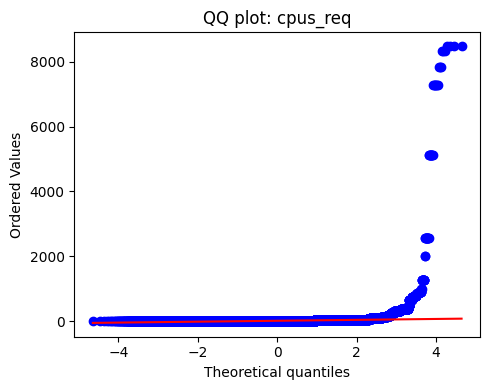

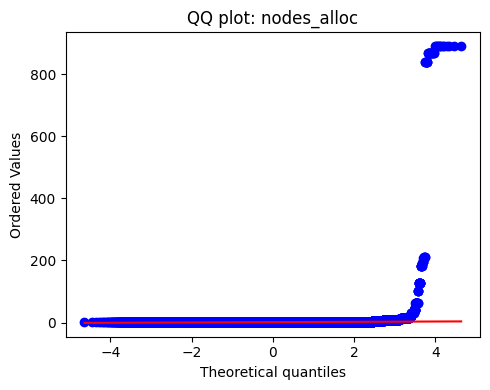

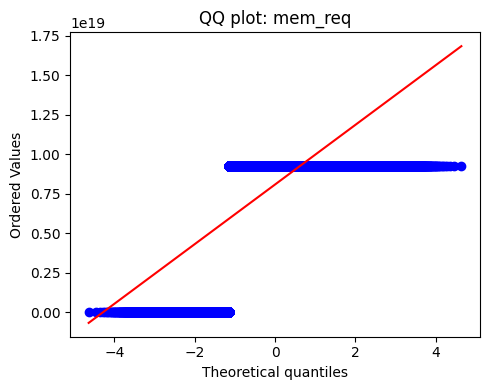

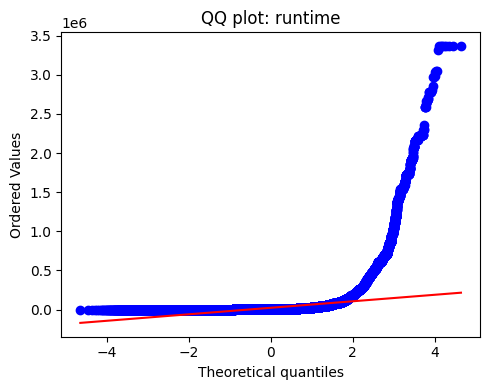

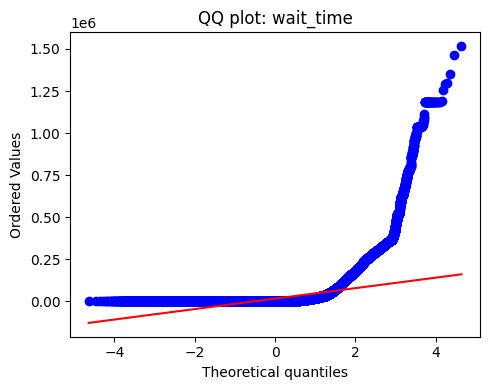

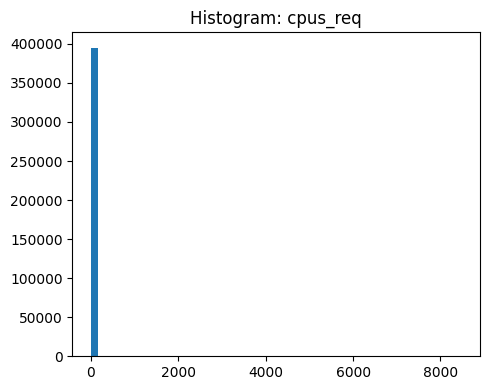

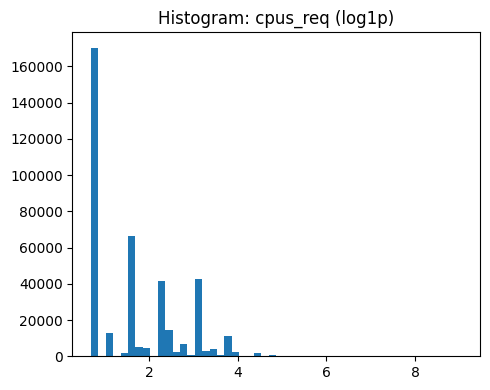

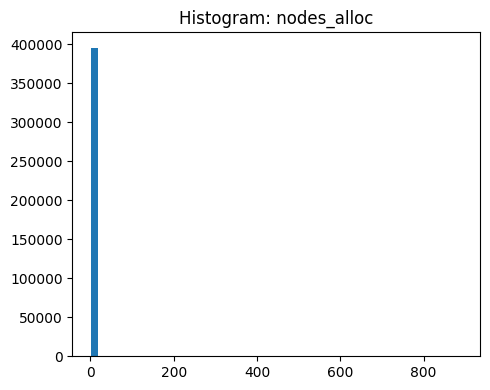

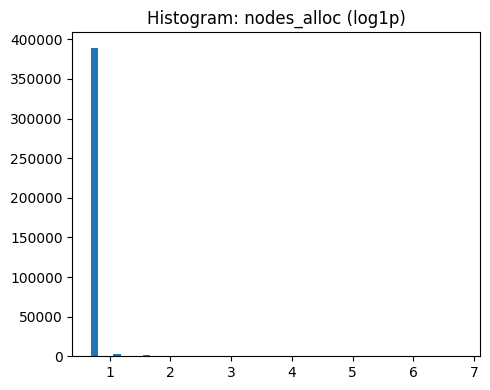

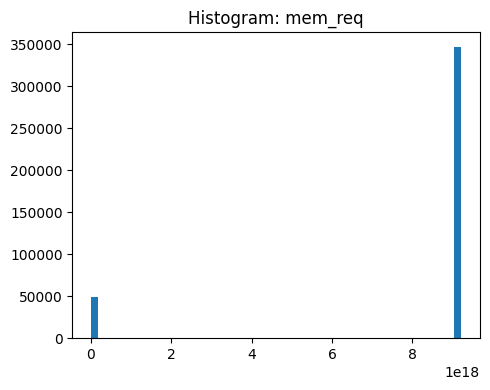

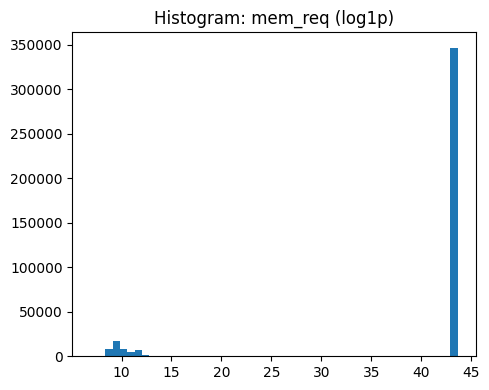

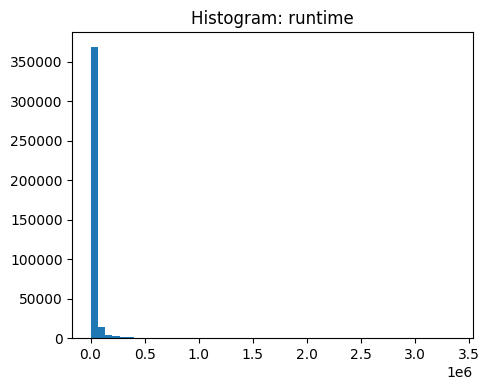

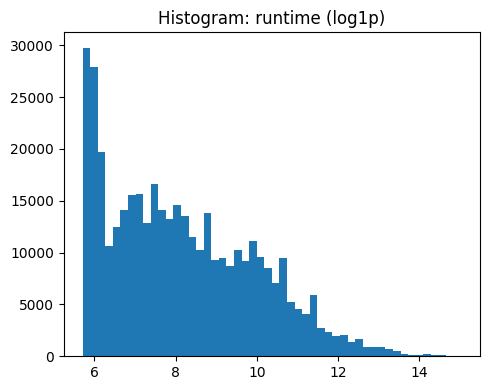

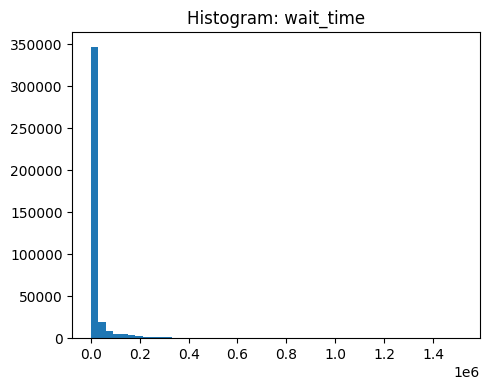


=== IQR outlier fraction (top 15) ===
               feature  iqr_outlier_frac
30  tres_req_gpu_volta          0.247955
8                state          0.219434
1             cpus_req          0.171565
25    tres_req_billing          0.171552
21        tres_req_cpu          0.171552
22        tres_req_mem          0.163243
10           wait_time          0.158815
9              runtime          0.133610
2              mem_req          0.128121
13   tres_alloc_energy          0.120541
11      tres_alloc_cpu          0.119804
15  tres_alloc_billing          0.119804
3             priority          0.068570
12      tres_alloc_mem          0.065305
7            exit_code          0.065075


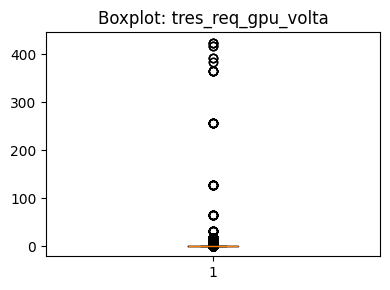

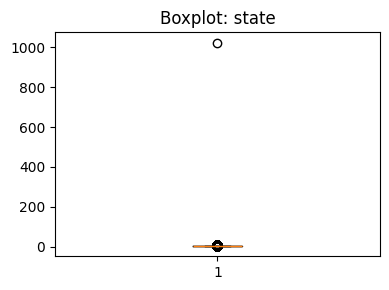

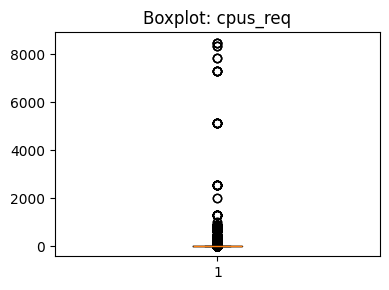

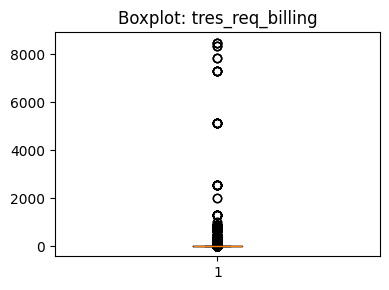

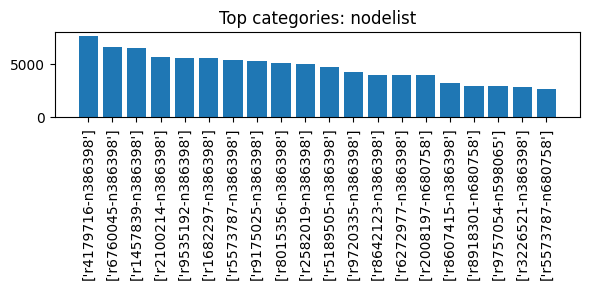

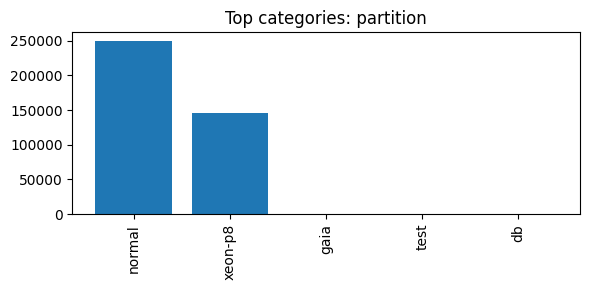

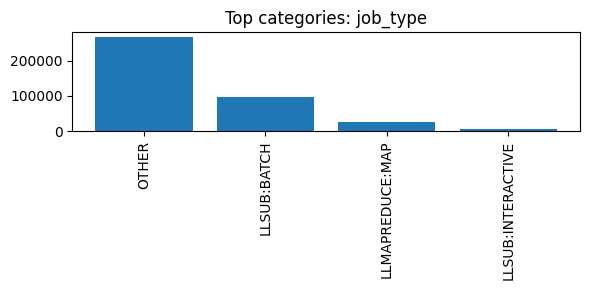

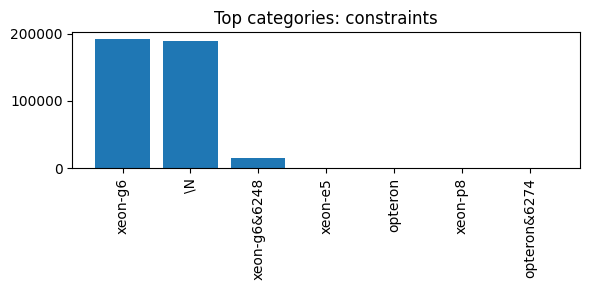

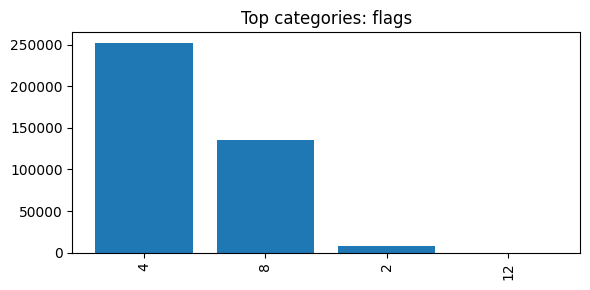

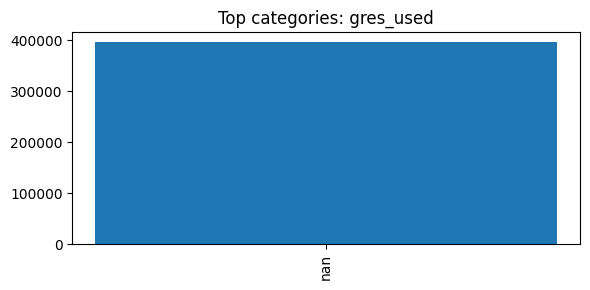

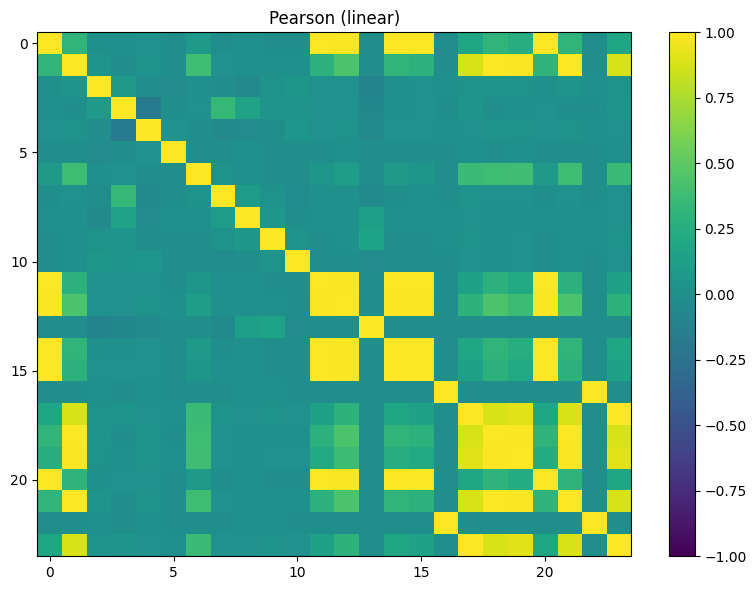

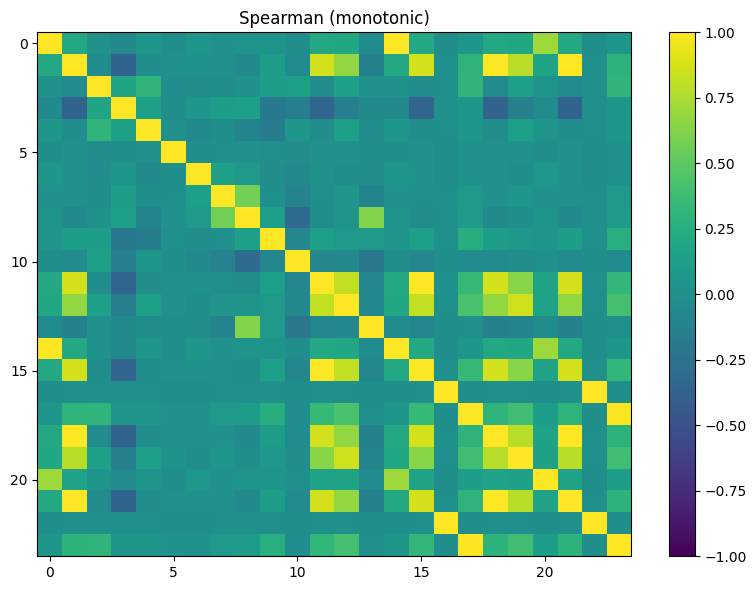

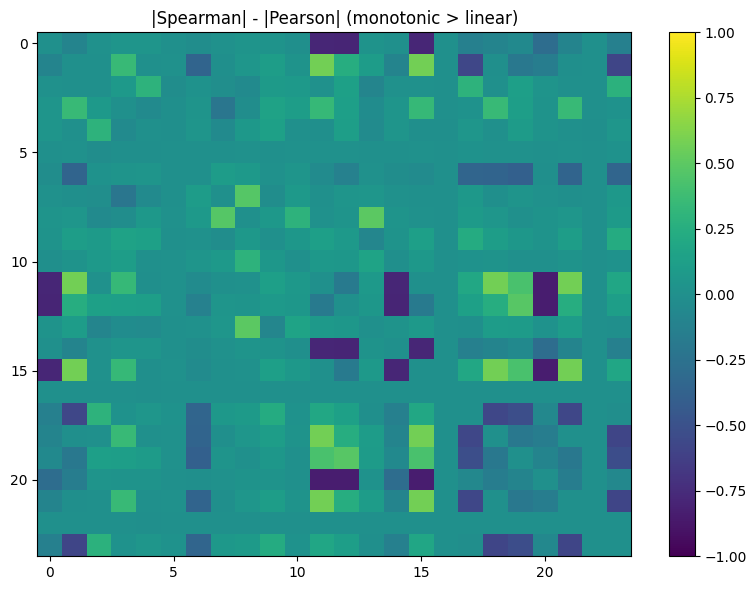


=== Mutual Information (numeric -> categorical target: state) ===
state                   0.756001
tres_alloc_energy       0.322403
exit_code               0.275843
runtime                 0.216723
priority                0.207626
timelimit               0.157874
tres_alloc_mem          0.132592
tres_req_mem            0.130746
wait_time               0.120666
tres_alloc_cpu          0.038159
tres_req_billing        0.037994
tres_alloc_billing      0.037905
cpus_req                0.037739
tres_req_cpu            0.036769
mem_req                 0.027316
tres_alloc_gpu_volta    0.013593
tres_req_gpu_volta      0.011737
tres_alloc_node         0.004502
derived_ec              0.004360
nodes_alloc             0.003818
dtype: float64


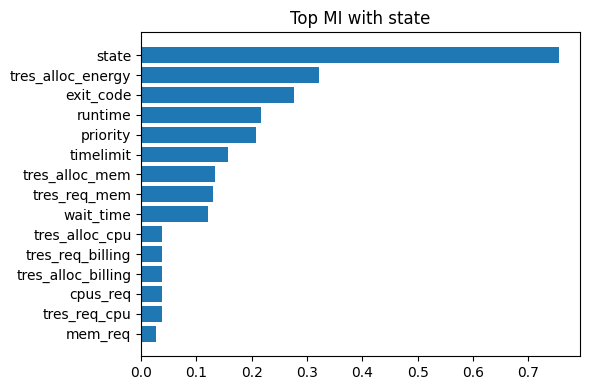


=== Mutual Information (numeric -> runtime) ===
priority                0.953000
tres_alloc_mem          0.646053
tres_req_mem            0.631590
wait_time               0.526283
timelimit               0.369020
tres_alloc_cpu          0.280101
tres_alloc_billing      0.278506
tres_req_billing        0.255744
cpus_req                0.255470
tres_req_cpu            0.253978
state                   0.216468
tres_alloc_energy       0.135294
tres_alloc_gpu_volta    0.085295
tres_req_gpu_volta      0.085246
mem_req                 0.053861
exit_code               0.022996
tres_alloc_node         0.005154
nodes_alloc             0.004901
tres_req_node           0.002726
tres_req_gpu_tesla      0.000619
dtype: float64


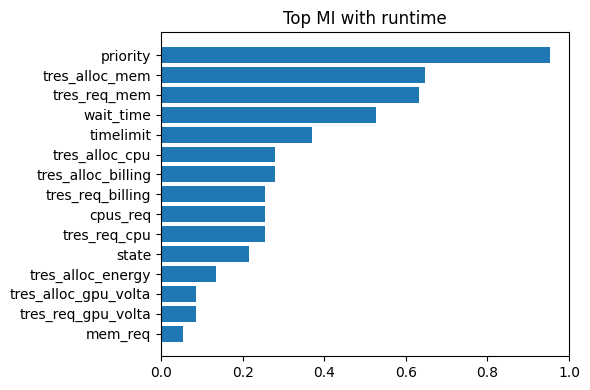


=== Strong categorical–categorical associations (Cramér’s V) ===
          cat1         cat2  cramers_v
1    partition  constraints   0.767854
4     job_type        flags   0.429890
3     job_type  constraints   0.302058
0    partition     job_type   0.084911
5  constraints        flags   0.071757
2    partition        flags   0.067151


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



=== Variance Inflation Factor (top 20) ===
                 feature           VIF
12       tres_alloc_node           inf
10        tres_alloc_cpu  1.125900e+15
15          tres_req_cpu  3.753000e+14
13    tres_alloc_billing  3.602880e+14
18      tres_req_billing  3.334765e+12
0            nodes_alloc  5.299020e+05
1               cpus_req  2.499638e+05
11        tres_alloc_mem  2.437285e+03
17         tres_req_node  7.622207e+02
14  tres_alloc_gpu_volta  4.274423e+02
19    tres_req_gpu_volta  4.244852e+02
16          tres_req_mem  2.592986e+02
3               priority  1.206694e+00
5             derived_ec  1.182389e+00
6              exit_code  1.130589e+00
4              timelimit  1.046758e+00
7                  state  1.036550e+00
2                mem_req  1.036118e+00
9              wait_time  1.011617e+00
8                runtime  1.009003e+00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


df = pd.read_csv("mit_supercloud_dataset_s 2/slurm-log.csv")


df = df[[c for c in df.columns if 'array' not in c.lower()]]


TRES_MAP = {
    1: "cpu", 2: "mem", 3: "energy", 4: "node", 5: "billing",
    6: "fs", 7: "vmem", 8: "pages", 1001: "gpu_tesla", 1002: "gpu_volta"
}

def parse_tres(series: pd.Series, prefix: str) -> pd.DataFrame:
    s = series.fillna("")
    out = {}
    for key, name in TRES_MAP.items():
        
        pat = rf'(?:^|,){key}=([0-9]*\.?[0-9]+)'
        out[f"{prefix}_{name}"] = pd.to_numeric(
            s.str.extract(pat, expand=False), errors='coerce'
        ).fillna(0.0)
    return pd.DataFrame(out)

for tres_col in ["tres_alloc", "tres_req"]:
    if tres_col in df.columns:
        tres_df = parse_tres(df[tres_col], tres_col)
        df = pd.concat([df.drop(columns=[tres_col]), tres_df], axis=1)


for c in ["time_submit","time_eligible","time_start","time_end"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

if set(["time_start","time_end"]).issubset(df.columns):
    df["runtime"] = (df["time_end"] - df["time_start"]).clip(lower=0)
if set(["time_submit","time_start"]).issubset(df.columns):
    df["wait_time"] = (df["time_start"] - df["time_submit"]).clip(lower=0)


drop_times = ["time_submit","time_eligible","time_start","time_end","time_suspended"]
df = df.drop(columns=[c for c in drop_times if c in df.columns], errors="ignore")


numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in numeric_cols]


prefer_numeric = [c for c in [
    "nodes_alloc","cpus_req","mem_req","priority","timelimit","track_steps",
    "derived_ec","exit_code","state",  # note: state/exit_code are actually discrete but numeric in logs
    "runtime","wait_time",
] if c in df.columns]


prefer_numeric += [c for c in df.columns if c.startswith("tres_alloc_") or c.startswith("tres_req_")]
prefer_numeric = list(dict.fromkeys([c for c in prefer_numeric if c in numeric_cols]))


prefer_cats = [c for c in [
    "nodelist","partition","job_type","constraints","flags","gres_used"
] if c in df.columns]


miss = df.isna().mean().sort_values(ascending=False)
print("\n=== Missingness fraction (top 20) ===")
print(miss.head(20))


def qqplot(series, title):
    plt.figure(figsize=(5,4))
    stats.probplot(series.dropna(), dist="norm", plot=plt)
    plt.title(title)
    plt.tight_layout()
    plt.show()


for col in [c for c in ["cpus_req","nodes_alloc","mem_req","runtime","wait_time"] if c in prefer_numeric][:5]:
    qqplot(df[col], f"QQ plot: {col}")


def hist_plot(series, title):
    x = series.dropna()
    plt.figure(figsize=(5,4))
    bins = 50
    plt.hist(x, bins=bins)
    plt.title(title)
    plt.tight_layout()
    plt.show()

    if (x > 0).mean() > 0.98:  # most positive
        plt.figure(figsize=(5,4))
        plt.hist(np.log1p(x), bins=bins)
        plt.title(title + " (log1p)")
        plt.tight_layout()
        plt.show()

for col in [c for c in ["cpus_req","nodes_alloc","mem_req","runtime","wait_time"] if c in prefer_numeric][:5]:
    hist_plot(df[col], f"Histogram: {col}")


def iqr_outlier_fraction(x):
    x = x.dropna()
    if len(x) < 5: return np.nan
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((x < lower) | (x > upper)).mean()

outlier_stats = []
for col in prefer_numeric:
    outlier_stats.append((col, iqr_outlier_fraction(df[col])))
outlier_df = pd.DataFrame(outlier_stats, columns=["feature","iqr_outlier_frac"]).sort_values("iqr_outlier_frac", ascending=False)
print("\n=== IQR outlier fraction (top 15) ===")
print(outlier_df.head(15))


for col in outlier_df.head(4)["feature"]:
    plt.figure(figsize=(4,3))
    plt.boxplot(df[col].dropna(), vert=True, showfliers=True)
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()


for col in prefer_cats:
    vc = df[col].astype("category").value_counts(dropna=False).head(20)
    plt.figure(figsize=(6,3))
    plt.bar(vc.index.astype(str), vc.values)
    plt.xticks(rotation=90)
    plt.title(f"Top categories: {col}")
    plt.tight_layout()
    plt.show()


num_for_corr = [c for c in prefer_numeric if df[c].nunique() > 1]
num_df = df[num_for_corr].copy()
num_df = num_df.fillna(num_df.median(numeric_only=True))

pearson = num_df.corr(method="pearson")
spearman = num_df.corr(method="spearman")
delta = spearman.abs() - pearson.abs()

def heatmap(mat, title):
    plt.figure(figsize=(8,6))
    plt.imshow(mat, vmin=-1, vmax=1, aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.tight_layout()
    plt.show()

heatmap(pearson, "Pearson (linear)")
heatmap(spearman, "Spearman (monotonic)")
heatmap(delta, "|Spearman| - |Pearson| (monotonic > linear)")


target_cat = None
for c in ["state","job_type","partition"]:  # typical categorical outcomes
    if c in df.columns:
        target_cat = c
        break


if target_cat:
    y_cat = df[target_cat].astype("category")
    # encode categories to integers for MI
    enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    y_enc = enc.fit_transform(y_cat.values.reshape(-1,1)).ravel().astype(int)

    X_mi = num_df.copy()
    # normalize numeric features for fair MI scaling
    X_mi = pd.DataFrame(StandardScaler().fit_transform(X_mi), columns=X_mi.columns, index=X_mi.index)

    mi_vals = mutual_info_classif(X_mi, y_enc, discrete_features=False, random_state=0)
    mi_series = pd.Series(mi_vals, index=X_mi.columns).sort_values(ascending=False)
    print("\n=== Mutual Information (numeric -> categorical target: {}) ===".format(target_cat))
    print(mi_series.head(20))

  
    top = mi_series.head(15)
    plt.figure(figsize=(6,4))
    plt.barh(top.index[::-1], top.values[::-1])
    plt.title(f"Top MI with {target_cat}")
    plt.tight_layout()
    plt.show()

if "runtime" in num_df.columns and num_df["runtime"].nunique() > 10:
    y_num = num_df["runtime"].values
    X_num = num_df.drop(columns=["runtime"], errors="ignore")
    X_num_sc = pd.DataFrame(StandardScaler().fit_transform(X_num), columns=X_num.columns, index=X_num.index)
    mi_vals = mutual_info_regression(X_num_sc, y_num, random_state=0)
    mi_series = pd.Series(mi_vals, index=X_num_sc.columns).sort_values(ascending=False)
    print("\n=== Mutual Information (numeric -> runtime) ===")
    print(mi_series.head(20))
    top = mi_series.head(15)
    plt.figure(figsize=(6,4))
    plt.barh(top.index[::-1], top.values[::-1])
    plt.title("Top MI with runtime")
    plt.tight_layout()
    plt.show()


def cramers_v(confusion):
    chi2 = stats.chi2_contingency(confusion, correction=False)[0]
    n = confusion.sum().sum()
    r, k = confusion.shape
    return np.sqrt((chi2 / n) / (min(k-1, r-1))) if min(k-1, r-1) > 0 else np.nan

cat_pairs = []
cats = [c for c in prefer_cats if df[c].notna().any()]
for i in range(len(cats)):
    for j in range(i+1, len(cats)):
        a, b = cats[i], cats[j]
        # cap cardinality for stability
        if df[a].nunique() > 50 or df[b].nunique() > 50:
            continue
        tbl = pd.crosstab(df[a], df[b])
        if tbl.size > 0:
            cv = cramers_v(tbl)
            cat_pairs.append((a, b, cv))

if cat_pairs:
    cat_df = pd.DataFrame(cat_pairs, columns=["cat1","cat2","cramers_v"]).sort_values("cramers_v", ascending=False)
    print("\n=== Strong categorical–categorical associations (Cramér’s V) ===")
    print(cat_df.head(15))

vif_features = [c for c in num_df.columns if num_df[c].nunique() > 2]
X_vif = num_df[vif_features].copy().fillna(num_df.median(numeric_only=True))
X_vif = pd.DataFrame(StandardScaler().fit_transform(X_vif), columns=vif_features)
vif_list = []
for i in range(X_vif.shape[1]):
    try:
        vif_list.append((X_vif.columns[i], variance_inflation_factor(X_vif.values, i)))
    except Exception:
        vif_list.append((X_vif.columns[i], np.nan))
vif_df = pd.DataFrame(vif_list, columns=["feature","VIF"]).sort_values("VIF", ascending=False)
print("\n=== Variance Inflation Factor (top 20) ===")
print(vif_df.head(20))
